# CAPSTONE PROJECT

## Credit Card Default

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")


#import os 
import scipy.stats as stats

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn import tree

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
pd.options.display.float_format = '{:.2f}'.format

# NOTES I 

### Importing the dataset

In [2]:
credit = pd.read_excel('banking_PD_modelling_dataset.xlsx')

In [3]:
credit.head(10)

,userid,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,4567129.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,NaN,...,14.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,178839.00,9.65
1,2635118.00,0.00,0.00,0.00,0.00,0.00,NaN,1.00,1.00,1.00,...,19.00,3.00,1.00,2.00,2.00,0.00,0.00,0.00,49014.00,13.18
2,4804232.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,...,0.00,3.00,1.00,2.00,2.00,0.00,0.00,0.00,124839.00,11.56
3,1442693.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,324676.00,15.75
4,4575322.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,...,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,7100.00,12.70
5,1534132.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.33
6,1179589.00,0.00,0.00,0.00,142.00,0.00,0.00,1.00,2.00,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2182448.00,0.00,57229.00,0.00,0.00,0.00,0.23,1.00,1.00,1.00,...,257.00,0.00,1.00,1.00,1.00,0.00,42206.00,35336.00,457257.00,12.19
8,1661559.00,0.00,148922.00,0.00,47.00,0.00,0.97,1.00,2.00,2.00,...,2.00,3.00,2.00,2.00,2.00,0.00,104643.00,32381.00,24390.00,21.41
9,4628751.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,...,10.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,78620.00,13.34


### Checking last 5 rows

In [4]:
credit.tail(10)

,userid,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
99969,3403106.00,NaN,0.00,365.00,0.00,0.00,0.37,1.00,1.00,4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99970,3990080.00,NaN,88405.00,0.00,15.00,0.00,0.67,2.00,2.00,2.00,...,2.00,0.00,0.00,0.00,1.00,0.00,28870.00,25771.00,0.00,9.06
99971,3115649.00,NaN,0.00,0.00,0.00,0.00,NaN,1.00,1.00,NaN,...,2.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,60127.00,10.77
99972,1744943.00,NaN,0.00,0.00,0.00,0.00,0.00,1.00,1.00,NaN,...,3.00,0.00,0.00,1.00,1.00,0.00,7948.00,0.00,4740.00,21.71
99973,4333001.00,NaN,45671.00,0.00,20.00,0.00,0.71,2.00,2.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,17447.00,19627.00,3100.00,2.19
99974,4648093.00,NaN,56102.00,0.00,0.00,0.00,0.06,1.00,2.00,1.00,...,1.00,0.00,1.00,1.00,1.00,0.00,18339.00,56180.00,34785.00,9.73
99975,1247657.00,NaN,0.00,0.00,0.00,0.00,NaN,1.00,1.00,NaN,...,2.00,1.00,2.00,2.00,2.00,0.00,0.00,0.00,30602.00,11.59
99976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99978,0.00,10000.00,0.00,11836.00,11836.00,11836.00,59315.00,54373.00,54373.00,66761.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Now, let us check the number of rows and the number of columns 

In [5]:
print('Total number of rows in the dataset:',credit.shape[0])
print('Total number of columns in the dataset:',credit.shape[1])

Total number of rows in the dataset: 99979
Total number of columns in the dataset: 36


In [6]:
credit.columns

Index(['userid', 'default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m', 'acct_status',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'merchant_category',
       'merchant_group', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'name_in_email',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

### Checking basic info about all columns

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99979 entries, 0 to 99978
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   userid                            99977 non-null  float64
 1   default                           89977 non-null  float64
 2   acct_amt_added_12_24m             99977 non-null  float64
 3   acct_days_in_dc_12_24m            88141 non-null  float64
 4   acct_days_in_rem_12_24m           88141 non-null  float64
 5   acct_days_in_term_12_24m          88141 non-null  float64
 6   acct_incoming_debt_vs_paid_0_24m  40662 non-null  float64
 7   acct_status                       45604 non-null  float64
 8   acct_worst_status_0_3m            45604 non-null  float64
 9   acct_worst_status_12_24m          33216 non-null  float64
 10  acct_worst_status_3_6m            42275 non-null  float64
 11  acct_worst_status_6_12m           39627 non-null  float64
 12  age 

#### As we can see out of the 36 columns, 3 are of "object" datatype namely 'merchant_category', 'merchant_group' and 'name_in_email' while the other 33 columns are all numeric in nature having "float64" as datatype.

### Checking for duplicates:

In [8]:
if credit.duplicated().sum()==0:
    print('There are no duplicate rows in the dataset.')
else:
    print('Total number of duplicate rows in the dataset :',credit.duplicated().sum())


Total number of duplicate rows in the dataset : 1


In [9]:
credit.drop_duplicates(inplace=True)

In [10]:
if credit.duplicated().sum()==0:
    print('There are no duplicate rows in the dataset.')
else:
    print('Total number of duplicate rows in the dataset :',credit.duplicated().sum())


There are no duplicate rows in the dataset.


### Now, checking 5 point summary stats of the data

#### a) For categorical columns:

In [11]:
cat = credit.select_dtypes(include=['object']).columns
credit[cat].describe().T

,count,unique,top,freq
merchant_category,99977,58,Diversified entertainment,38614
merchant_group,99968,13,Entertainment,48779
name_in_email,88943,9,F+L,35822


#### b) For continuous numeric columns:

In [12]:
continuous = credit.select_dtypes(include=['float64']).columns
credit[continuous].describe().T

,count,mean,std,min,25%,50%,75%,max
userid,99977.00,2998946.73,1154210.60,0.00,2000260.00,2998815.00,4000633.00,4999868.00
default,89977.00,0.13,33.34,0.00,0.00,0.00,0.00,10000.00
acct_amt_added_12_24m,99977.00,12255.03,35481.33,0.00,0.00,0.00,4937.00,1128775.00
acct_days_in_dc_12_24m,88141.00,0.36,40.29,0.00,0.00,0.00,0.00,11836.00
acct_days_in_rem_12_24m,88141.00,5.18,45.94,0.00,0.00,0.00,0.00,11836.00
acct_days_in_term_12_24m,88141.00,0.42,39.97,0.00,0.00,0.00,0.00,11836.00
acct_incoming_debt_vs_paid_0_24m,40662.00,2.79,295.33,0.00,0.00,0.15,0.66,59315.00
acct_status,45604.00,2.23,254.61,1.00,1.00,1.00,1.00,54373.00
acct_worst_status_0_3m,45604.00,2.37,254.61,1.00,1.00,1.00,1.00,54373.00
acct_worst_status_12_24m,33216.00,3.35,366.30,1.00,1.00,1.00,2.00,66761.00


* Variables " acct_amt_added_12_24m", "acct_days_in_dc_12_24m" and "acct_days_in_rem_12_24m" contain data about no. of days in 1 year, <mark><strong> but all three have the last row value as 11,836 which is not possible.
* Also the variable "userid" for this last row is 0 where as "userid" values in the actual dataset seems to have a 7-digit number in general.
* <strong>Hence we will drop the last row here only as it is impacting our statistical summary and will further distort most of the plots.
* All other modifications to the dataset will be done after taking a look at the various plots in EDA part.

#### Dropping the last row


In [13]:
credit.drop(99978, inplace = True)
credit.tail()

,userid,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
99972,1744943.00,NaN,0.00,0.00,0.00,0.00,0.00,1.00,1.00,NaN,...,3.00,0.00,0.00,1.00,1.00,0.00,7948.00,0.00,4740.00,21.71
99973,4333001.00,NaN,45671.00,0.00,20.00,0.00,0.71,2.00,2.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,17447.00,19627.00,3100.00,2.19
99974,4648093.00,NaN,56102.00,0.00,0.00,0.00,0.06,1.00,2.00,1.00,...,1.00,0.00,1.00,1.00,1.00,0.00,18339.00,56180.00,34785.00,9.73
99975,1247657.00,NaN,0.00,0.00,0.00,0.00,NaN,1.00,1.00,NaN,...,2.00,1.00,2.00,2.00,2.00,0.00,0.00,0.00,30602.00,11.59
99976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking the 5 point summary for continuous variables again

In [14]:
continuous = credit.select_dtypes(include=['float64']).columns
credit[continuous].describe().T

,count,mean,std,min,25%,50%,75%,max
userid,99976.00,2998976.73,1154177.40,1000053.00,2000266.75,2998832.00,4000640.75,4999868.00
default,89976.00,0.01,0.12,0.00,0.00,0.00,0.00,1.00
acct_amt_added_12_24m,99976.00,12255.15,35481.48,0.00,0.00,0.00,4937.25,1128775.00
acct_days_in_dc_12_24m,88140.00,0.22,5.81,0.00,0.00,0.00,0.00,365.00
acct_days_in_rem_12_24m,88140.00,5.04,22.86,0.00,0.00,0.00,0.00,365.00
acct_days_in_term_12_24m,88140.00,0.29,2.93,0.00,0.00,0.00,0.00,97.00
acct_incoming_debt_vs_paid_0_24m,40661.00,1.33,26.48,0.00,0.00,0.15,0.66,3914.00
acct_status,45603.00,1.04,0.20,1.00,1.00,1.00,1.00,4.00
acct_worst_status_0_3m,45603.00,1.17,0.42,1.00,1.00,1.00,1.00,4.00
acct_worst_status_12_24m,33215.00,1.34,0.58,1.00,1.00,1.00,2.00,4.00


----

----

# 3) EDA (Exploratory data analysis)

## a) Univariate analysis

#### Checking the dataset variables for value counts and discripancies:

In [15]:
for i in credit.columns:
    print('Count of',i)
    print('-----------------------------------------')
    print(credit[i].value_counts(),'\n')
    print('Proportion of',i)
    print('-----------------------------------------')
    print(credit[i].value_counts(normalize=True),'\n\n')

Count of userid
-----------------------------------------
userid
1391263.00    3
4923797.00    3
3143346.00    3
3111808.00    3
4086262.00    3
             ..
1649459.00    1
1562210.00    1
3158445.00    1
1332359.00    1
1247657.00    1
Name: count, Length: 98722, dtype: int64 

Proportion of userid
-----------------------------------------
userid
1391263.00   0.00
4923797.00   0.00
3143346.00   0.00
3111808.00   0.00
4086262.00   0.00
             ... 
1649459.00   0.00
1562210.00   0.00
3158445.00   0.00
1332359.00   0.00
1247657.00   0.00
Name: proportion, Length: 98722, dtype: float64 


Count of default
-----------------------------------------
default
0.00    88688
1.00     1288
Name: count, dtype: int64 

Proportion of default
-----------------------------------------
default
0.00   0.99
1.00   0.01
Name: proportion, dtype: float64 


Count of acct_amt_added_12_24m
-----------------------------------------
acct_amt_added_12_24m
0.00        71362
50.00          34
30.00      

#### Distribution of data for categorical variables

* Looking at the value counts, the variables that look categorical in nature are as follows 

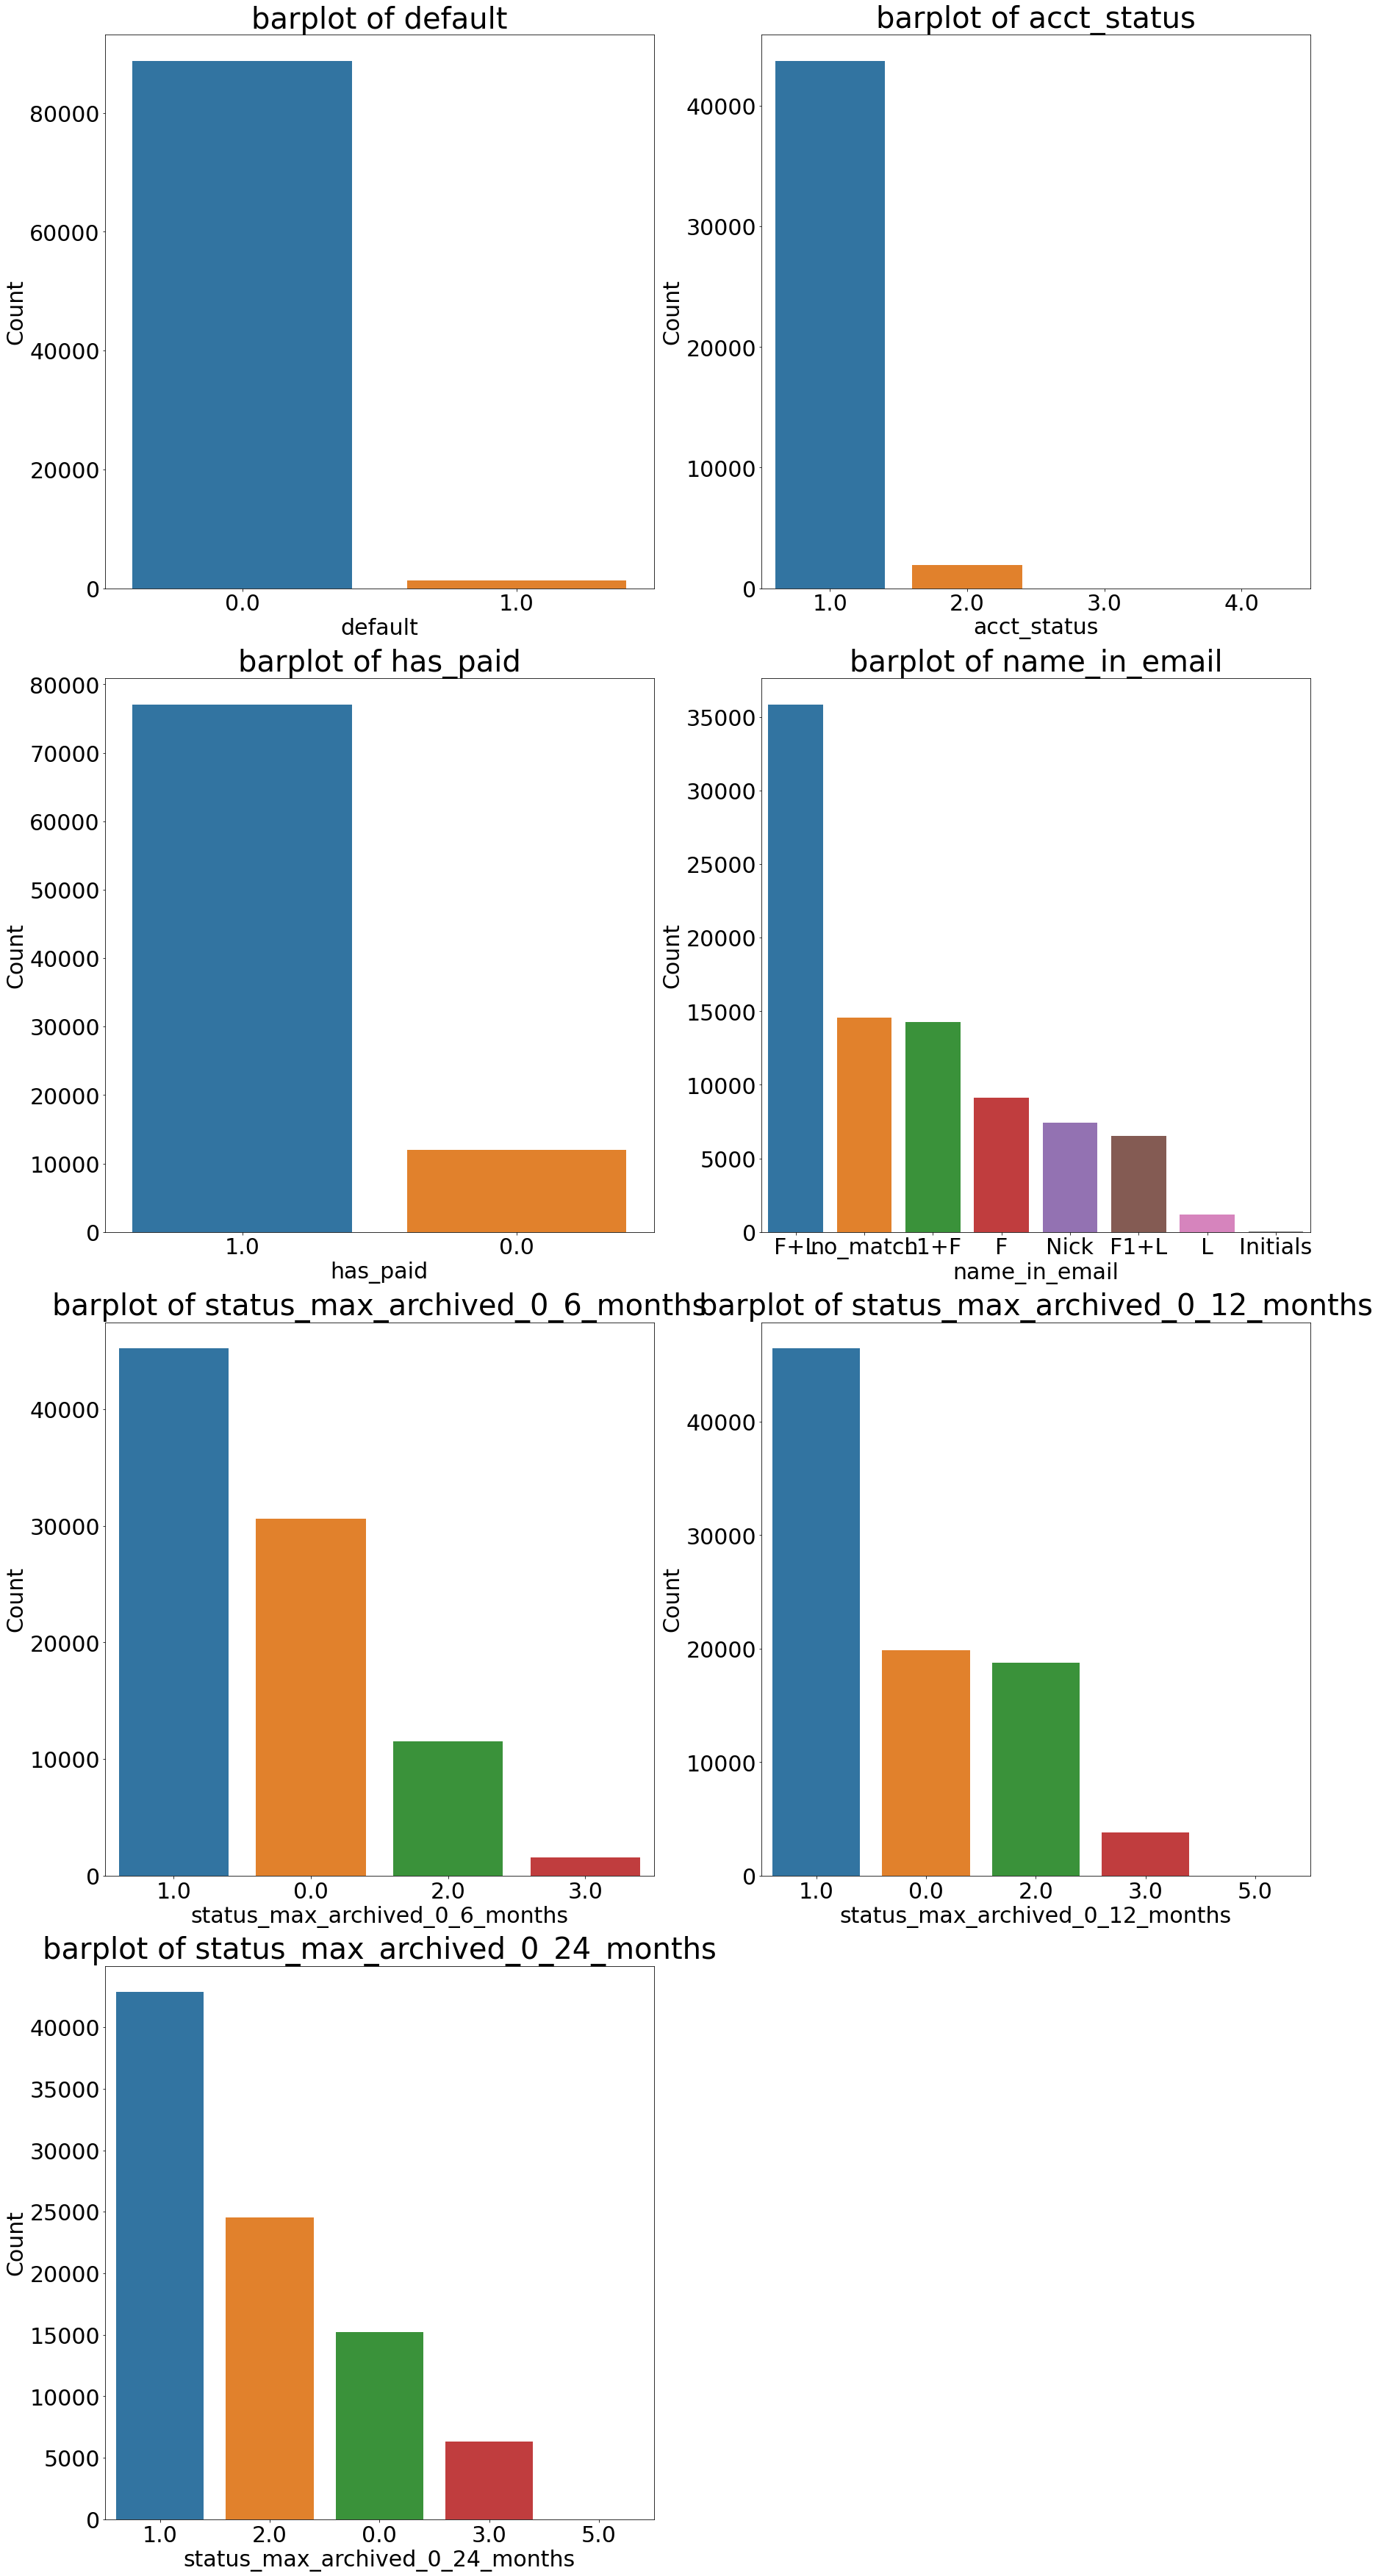

In [16]:
cat = ['default','acct_status','has_paid','name_in_email','status_max_archived_0_6_months',
       'status_max_archived_0_12_months','status_max_archived_0_24_months']

#plt.figure(figsize=(26,20))
plt.figure(figsize=(25,60))
a=1
for i in cat:
    plt.subplot(5,2,a)
    a=a+1
    sns.countplot(data=credit, x=credit[i], order=credit[i].value_counts().sort_values(ascending=False).index)
    plt.title('barplot of {}'.format(i), fontsize= 40)
    plt.xlabel(i, fontsize=30)
    plt.ylabel('Count', fontsize=30) 
    plt.tick_params(axis='both', which='both', labelsize=30) 
    plt.tight_layout()






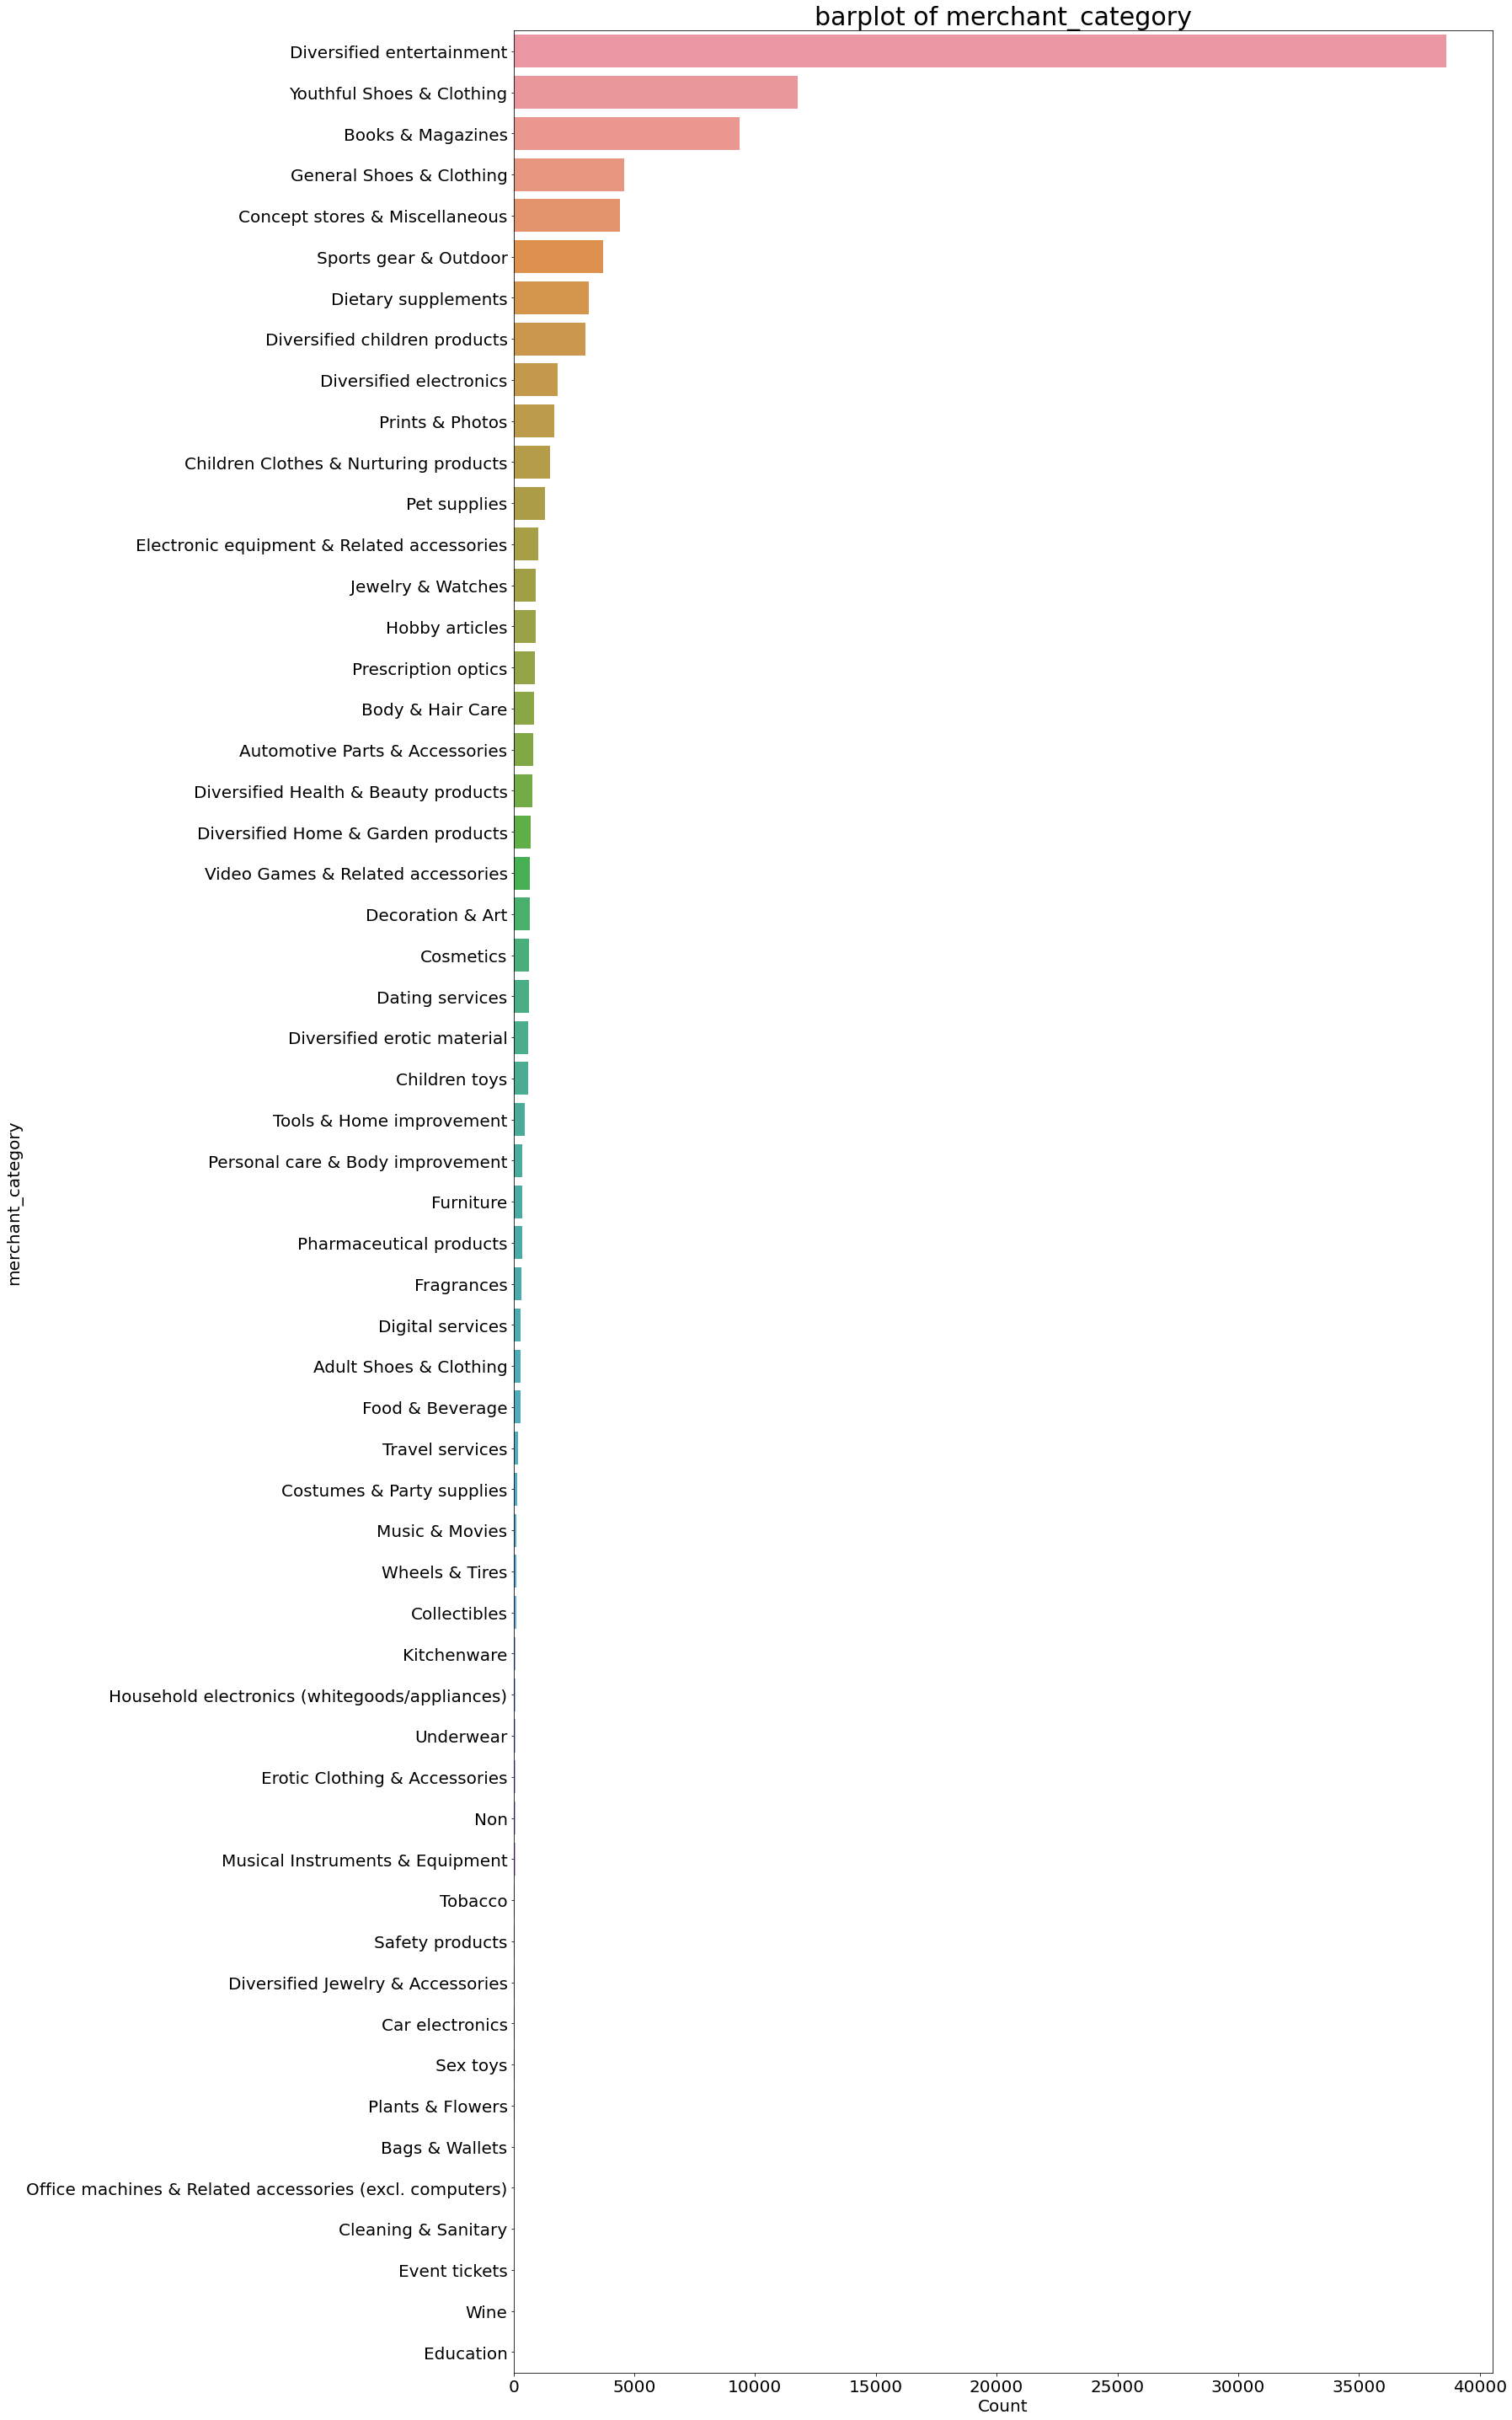

In [17]:
plt.figure(figsize=(25,40))
sns.countplot(data=credit, y='merchant_category', order=credit['merchant_category'].value_counts().sort_values(ascending=False).index)
plt.title('barplot of merchant_category', fontsize= 30)
plt.ylabel('merchant_category', fontsize=20)
plt.xlabel('Count', fontsize=20) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.tight_layout()


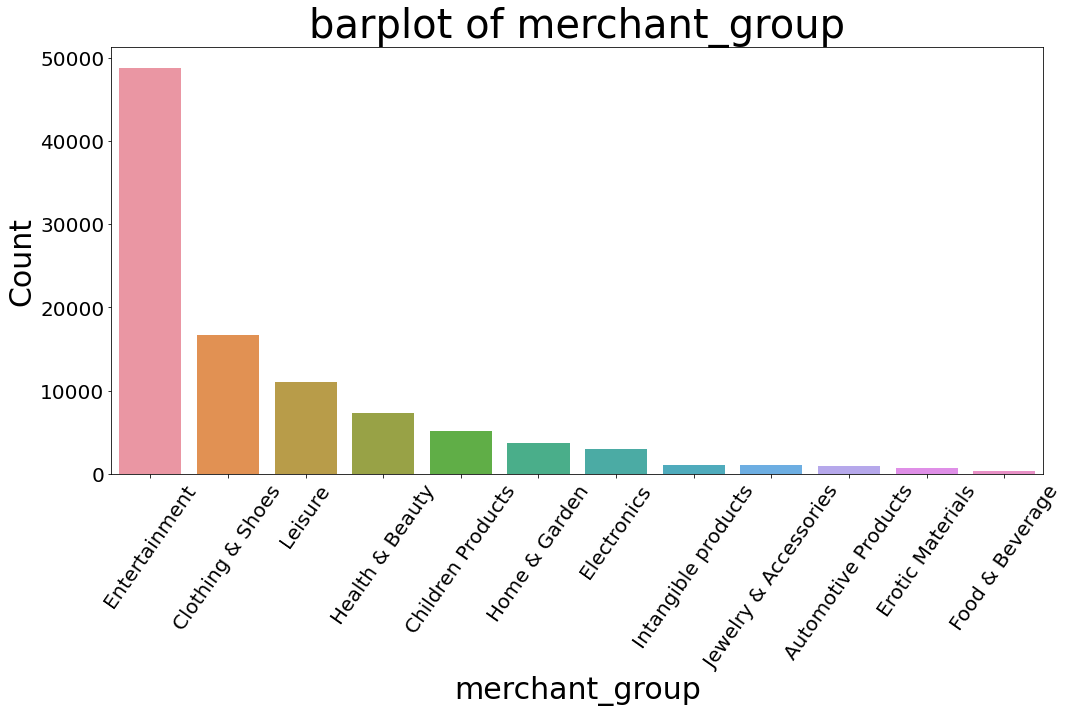

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(data=credit, x='merchant_group', order=credit['merchant_group'].value_counts().sort_values(ascending=False).index)
plt.title('barplot of merchant_group', fontsize= 40)
plt.xlabel('merchant_group', fontsize=30)
plt.ylabel('Count', fontsize=30) 
plt.xticks(rotation = 55, fontsize=20) 
plt.yticks(fontsize=20) 
plt.tight_layout()


#### Distribution of data for continuous variables

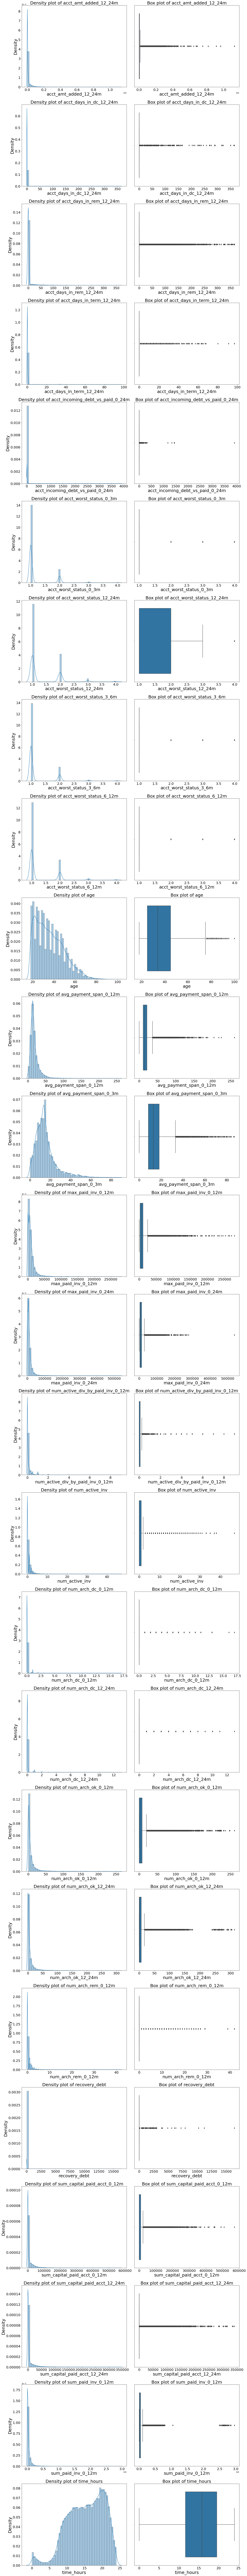

In [19]:
# List of continuous variables
continuous_vars = ['acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m','num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours']

# Set the figure dimensions
fig_dims = (20, 8 * len(continuous_vars))

# Create subplots for each continuous variable
fig, axes = plt.subplots(nrows=len(continuous_vars), ncols=2, figsize=fig_dims)

# Iterate through continuous variables
for i, var in enumerate(continuous_vars):
    # Histogram
    sns.distplot(credit[var], kde=True, ax=axes[i, 0], hist_kws={"edgecolor": "black"})
    axes[i, 0].set_title('Density plot of {}'.format(var), fontsize= 25)
    axes[i, 0].set_xlabel(var, fontsize=25)
    axes[i, 0].set_ylabel('Density', fontsize=25) 
    axes[i, 0].tick_params(axis='both', which='both', labelsize=20) 

    
    
    # Box plot
    sns.boxplot(x=var, data=credit, ax=axes[i, 1])
    axes[i, 1].set_title('Box plot of {}'.format(var), fontsize= 25)
    axes[i, 1].set_xlabel(var, fontsize=25)
    axes[i, 1].tick_params(axis='both', which='both', labelsize=20) 


plt.tight_layout()
plt.show()


#### There seems to be some abnormalities in the dataset:
* It's worth noting that the second last row has all the values missing, hence we will look for rows with a lot of missing values and drop such rows since imputing large amounts of missing values row-wise will distort our dataset.
* Variable "acct_status" should only have 0 and 1 as values as per the data dictionary, but in the actual dataset it has 1,2,3 and 4 as values. We need to find the reasoning behind this nomenclature or else drop this variable too if the logic cannot be found.
* we will also drop such variables which are not required for our model building namely 'userid', 'name_in_email'.

---

## b) Bivariate and Multivariate analysis

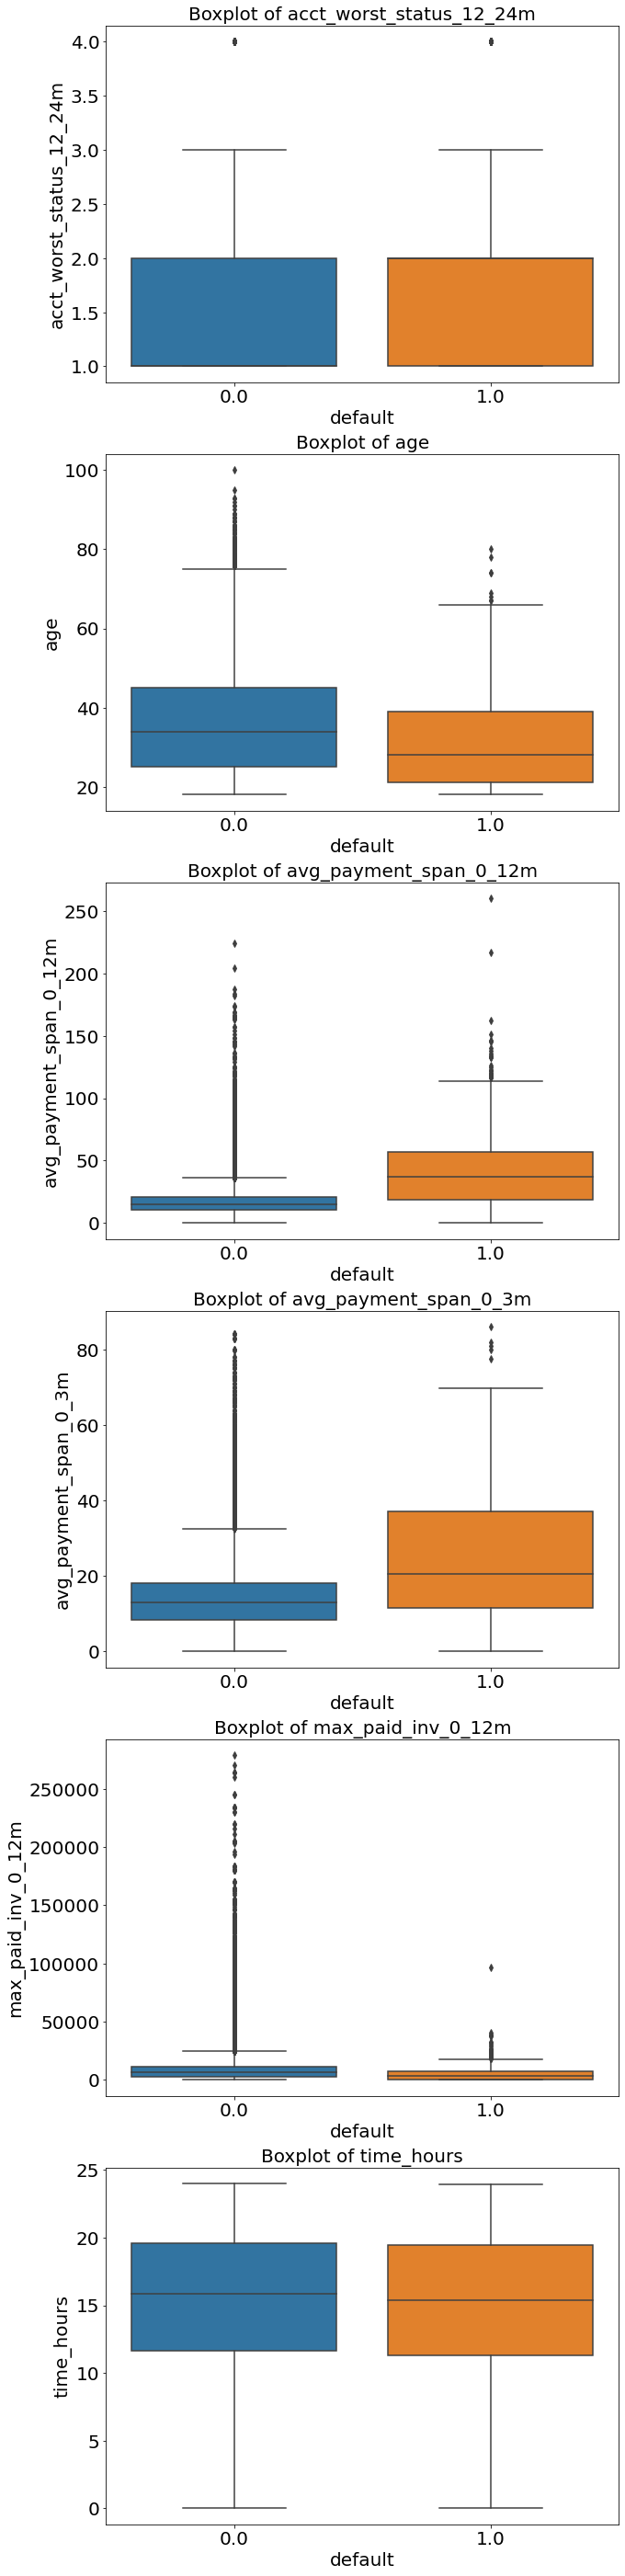

In [20]:
fig, axs = plt.subplots(nrows=6,ncols=1,figsize=(10,50))
sns.boxplot(x='default', y='acct_worst_status_12_24m', data=credit, ax=axs[0])
axs[0].set_title('Boxplot of acct_worst_status_12_24m', fontsize=20)
axs[0].set_xlabel('default', fontsize=20)
axs[0].set_ylabel('acct_worst_status_12_24m', fontsize=20)
axs[0].tick_params(axis='both', which='both', labelsize=20) 

sns.boxplot(x='default', y='age', data=credit, ax=axs[1])
axs[1].set_title('Boxplot of age', fontsize=20)
axs[1].set_xlabel('default', fontsize=20)
axs[1].set_ylabel('age', fontsize=20)
axs[1].tick_params(axis='both', which='both', labelsize=20)

sns.boxplot(x='default', y='avg_payment_span_0_12m', data=credit, ax=axs[2])
axs[2].set_title('Boxplot of avg_payment_span_0_12m', fontsize=20)
axs[2].set_xlabel('default', fontsize=20)
axs[2].set_ylabel('avg_payment_span_0_12m', fontsize=20)
axs[2].tick_params(axis='both', which='both', labelsize=20)

sns.boxplot(x='default', y='avg_payment_span_0_3m', data=credit, ax=axs[3])
axs[3].set_title('Boxplot of avg_payment_span_0_3m', fontsize=20)
axs[3].set_xlabel('default', fontsize=20)
axs[3].set_ylabel('avg_payment_span_0_3m', fontsize=20)
axs[3].tick_params(axis='both', which='both', labelsize=20)

sns.boxplot(x='default', y='max_paid_inv_0_12m', data=credit, ax=axs[4])
axs[4].set_title('Boxplot of max_paid_inv_0_12m', fontsize=20)
axs[4].set_xlabel('default', fontsize=20)
axs[4].set_ylabel('max_paid_inv_0_12m', fontsize=20)
axs[4].tick_params(axis='both', which='both', labelsize=20)

sns.boxplot(x='default', y='time_hours', data=credit, ax=axs[5])
axs[5].set_title('Boxplot of time_hours', fontsize=20)
axs[5].set_xlabel('default', fontsize=20)
axs[5].set_ylabel('time_hours', fontsize=20)
axs[5].tick_params(axis='both', which='both', labelsize=20)

plt.show()

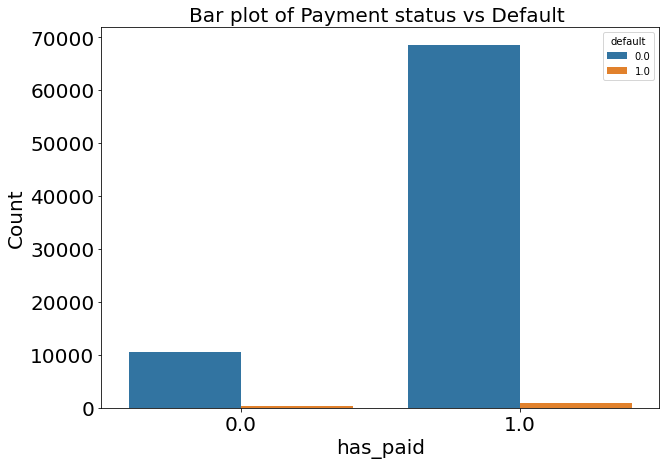

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(data=credit, x='has_paid', hue='default')
plt.title('Bar plot of Payment status vs Default ', fontsize= 20)
plt.xlabel('has_paid', fontsize=20)
plt.ylabel('Count', fontsize=20) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

* Since defaulters make only 1% of the dataset, bar plot comparison of categorical variables with the target variable is unlikely to produce any meaningful insights.  
* For checking the correlation between independent variables we will be using heatmap instead of scatterplots, as they are better at quantifying the correlation. 
* We are also looking at the pairplot to have a basic idea about the distribution of all the variables with respect to each other, this gives us a visual representation of the correlation between the variables as opposed to heatmap where we only get numerical representation of the correlation between variables. 
* But due to the dataset having large number of numerical variables, the pair plot becomes illegible as it produces all the possible combination of correlated variables. Still, it's okay enough for getting a bird's eye view on the numerical variables. Another downside of pairplots is that they take a lot of time to get executed especially if the dataset is large.
* Due to these reasons we use heatmaps as our main tool to check correlation between the independent continuous variables.

#### Pair plot

In [22]:
# plt.figure(figsize=(50,50))
# sns.pairplot(data=credit.drop(['userid', 'name_in_email','merchant_category','merchant_group'], axis = 1), corner=True)
# plt.show()

#### Heat map

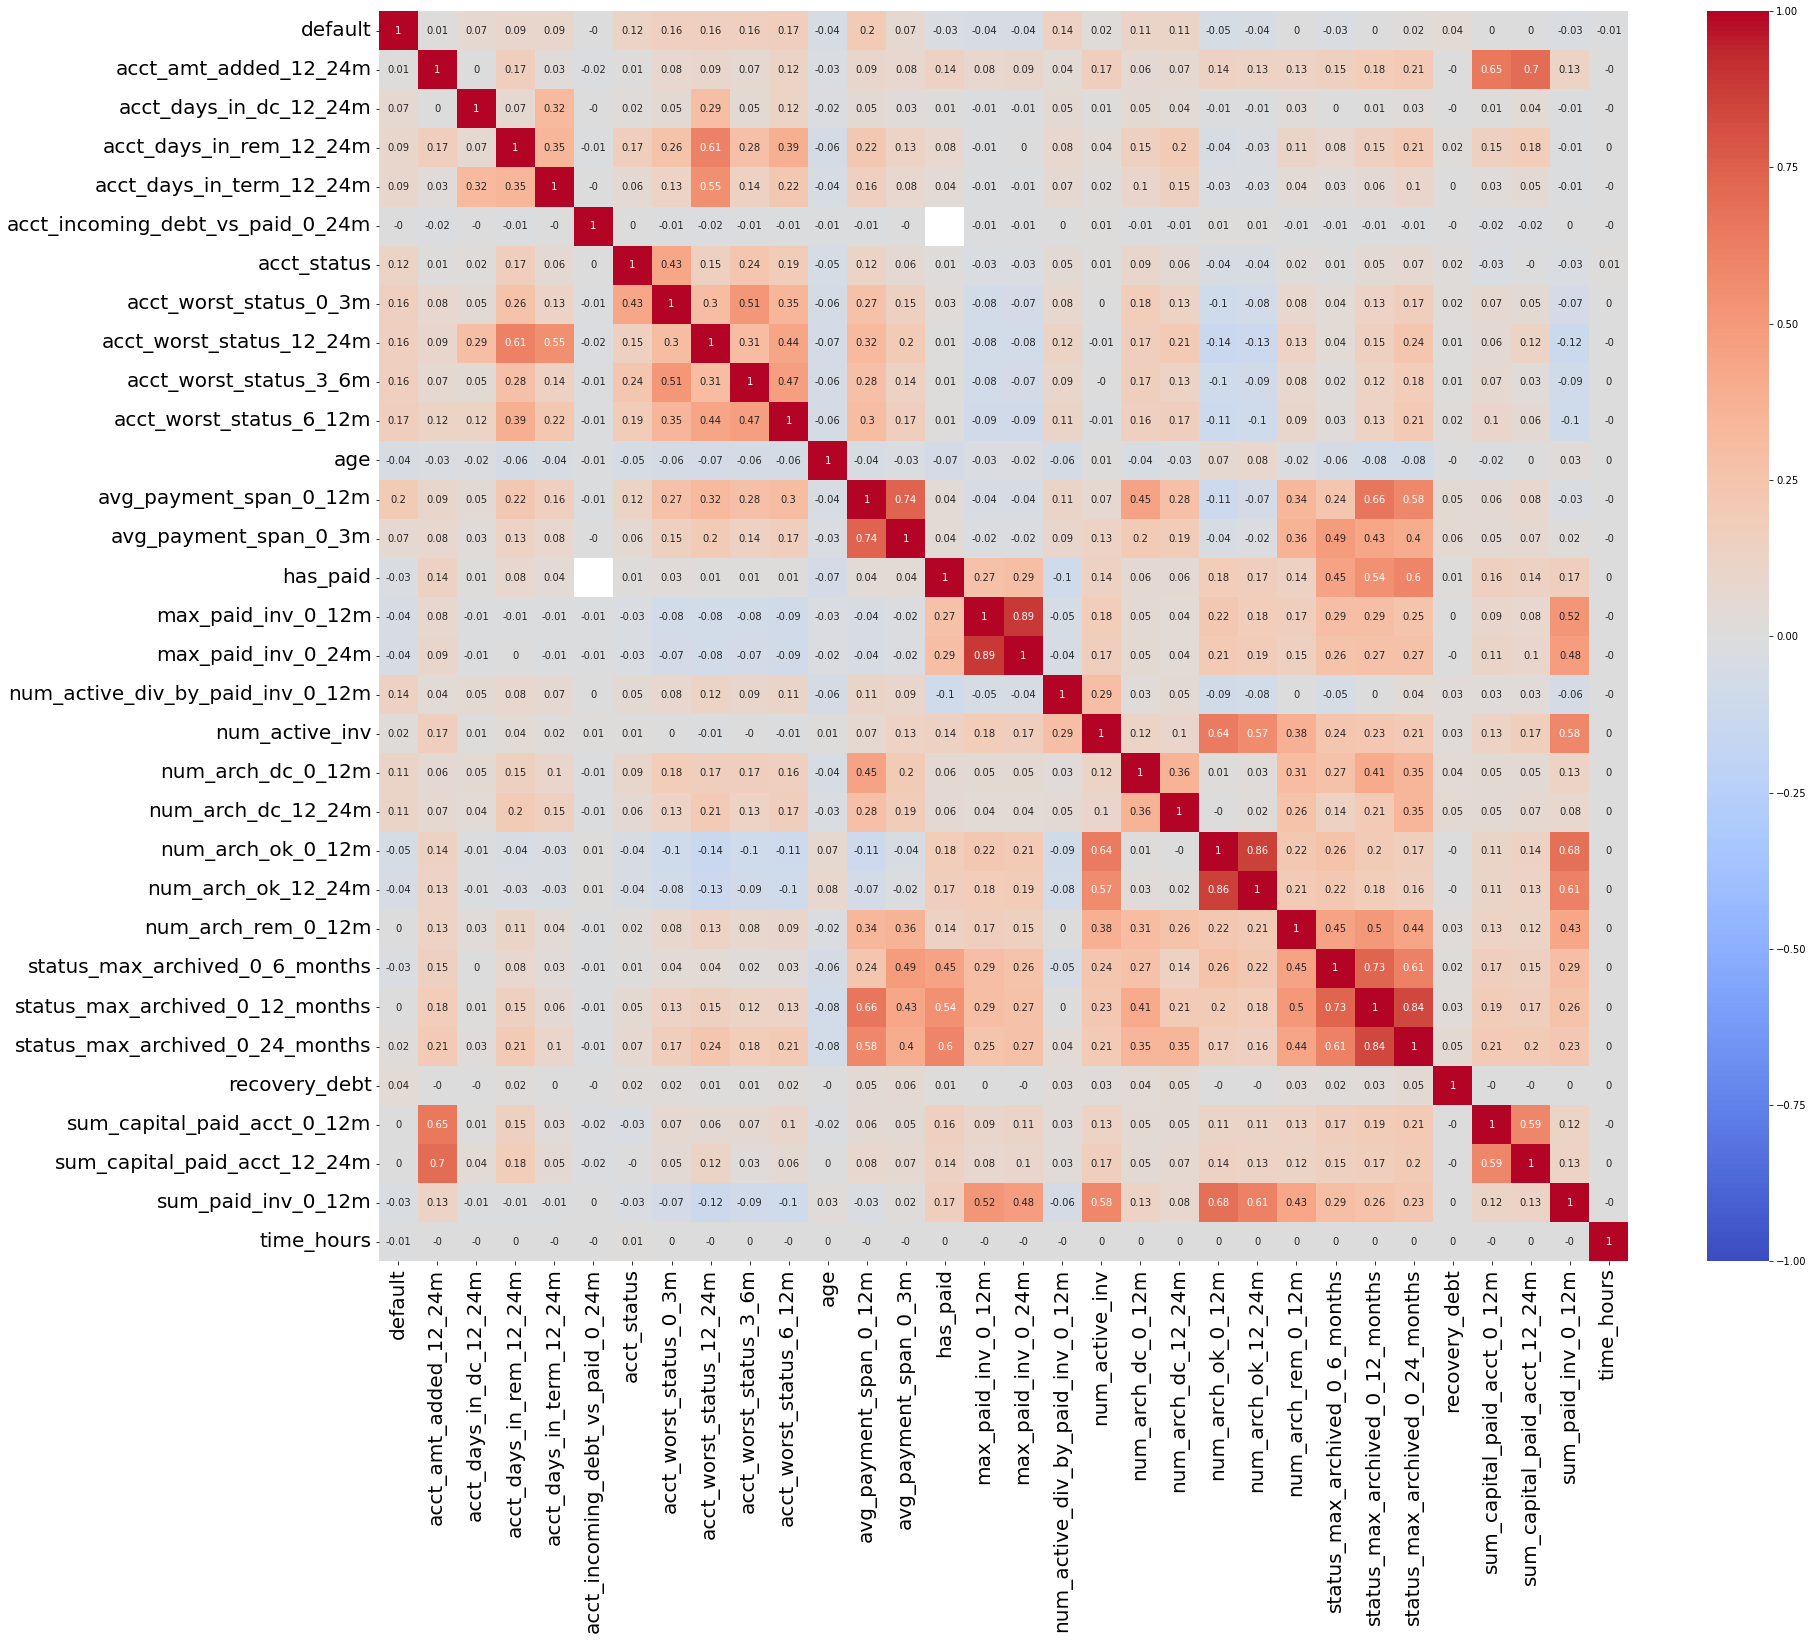

In [23]:
plt.figure(figsize = (28,23))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cor_matrix = credit.drop(['userid', 'name_in_email','merchant_category','merchant_group'], axis = 1).corr()
sns.heatmap(round(cor_matrix,2), cmap = 'coolwarm', vmin = -1, vmax= 1, annot=True)
plt.show()

----

## c) Removal of unwanted variables

In [24]:
credit.columns

Index(['userid', 'default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m', 'acct_status',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'merchant_category',
       'merchant_group', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'name_in_email',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

* Here we will be dropping the variables that are redundant to the model building exercise namely 'userid' and 'name_in_email'.
* We will also be dropping the categorical variables with "object" datatype namely 'merchant_category' and 'merchant_group' as there won't be much to get out of them even after encoding them as numeric variables using one-hot encoding or label encoding. 
* This is due to high cardinality in them, i.e. they have high number of unique categories. 'merchant_category' has 58 unique categories while 'merchant_group' has 13.


In [25]:
credit = credit.drop(['userid', 'name_in_email'], axis = 1)

In [26]:
credit.shape

(99977, 34)

In [27]:
credit.columns

Index(['default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m', 'acct_status',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'merchant_category',
       'merchant_group', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'num_active_div_by_paid_inv_0_12m',
       'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m',
       'num_arch_ok_0_12m', 'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

----

## d) Missing Value treatment

#### Checking for missing values in the dataset

In [28]:
missing = pd.DataFrame([credit.columns, credit.isnull().sum(), credit.isnull().sum()/credit.index.size*100])
missing = missing.T
missing.columns = ['Column_name','Missing_values','Percentage_missing_values']
missing

,Column_name,Missing_values,Percentage_missing_values
0,default,10001,10.00
1,acct_amt_added_12_24m,1,0.00
2,acct_days_in_dc_12_24m,11837,11.84
3,acct_days_in_rem_12_24m,11837,11.84
4,acct_days_in_term_12_24m,11837,11.84
5,acct_incoming_debt_vs_paid_0_24m,59316,59.33
6,acct_status,54374,54.39
7,acct_worst_status_0_3m,54374,54.39
8,acct_worst_status_12_24m,66762,66.78
9,acct_worst_status_3_6m,57703,57.72


#### Visually inspecting the missing values in the dataset using heatmap (white bars show missing values)

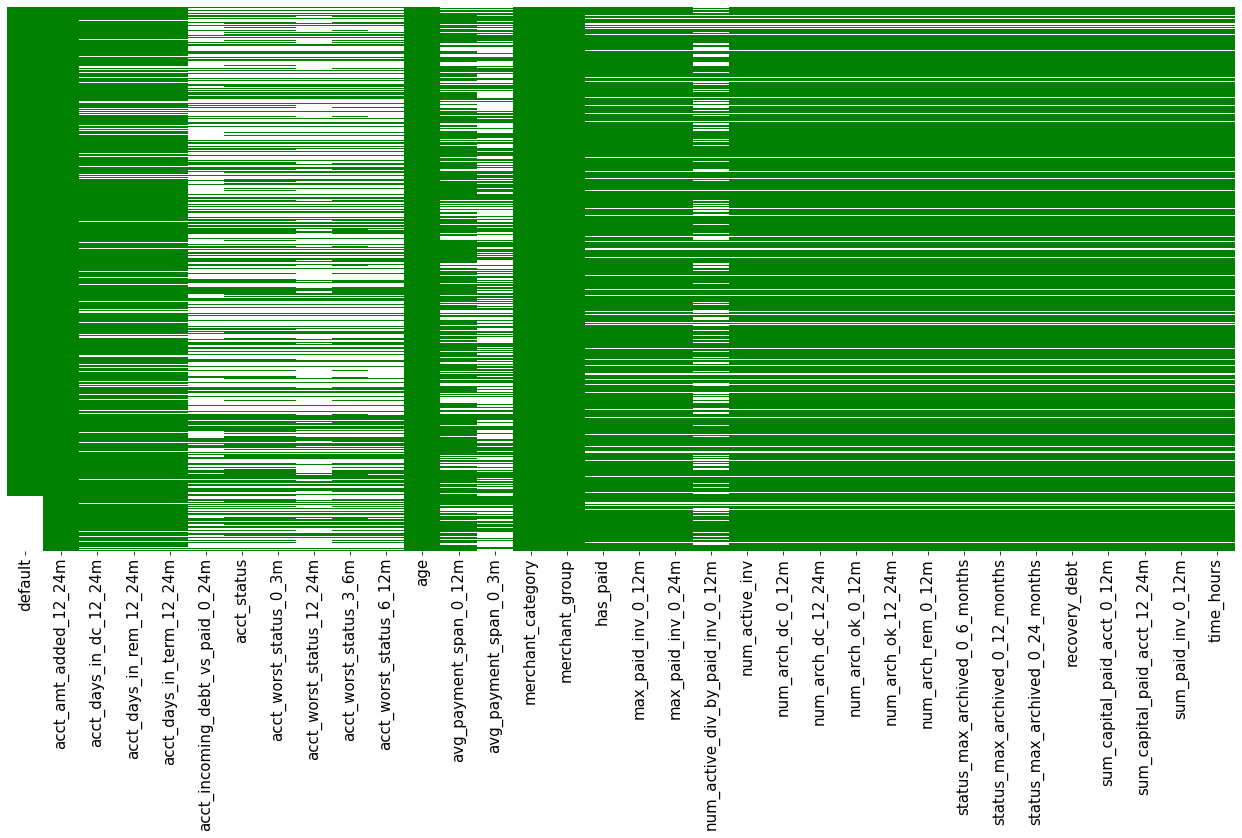

In [29]:
plt.figure(figsize = (22,10))
plt.xticks(fontsize=15)
sns.heatmap(credit.isnull(), cbar=False, cmap = 'ocean', yticklabels = False)
plt.show()

#### Checking the proportion of missing values

In [30]:
credit.size

3399218

In [31]:
credit.isnull().sum().sum()

689069

In [32]:
(689103/3399286)*100

20.271992412524277

* Total %age of missing values is around 20% which is a lot. Therefore we should be quite careful as to how we are going to treat these missing values. 

* There are a lot of missing values in the dataset. 
* Among them we should drop the variables which have atleast 30% of the data as missing values, as imputing such large number of missing values will lead to what we call an Analyst bias.
* It refers to an approach related bias, since missing values imputation differ from analyst to analyst and there is no sure shot way to do it.

#### After dropping the variables with more than 30% missing values, we are left with 24 independent variables.

In [33]:
missing[missing['Percentage_missing_values']>29]

,Column_name,Missing_values,Percentage_missing_values
5,acct_incoming_debt_vs_paid_0_24m,59316,59.33
6,acct_status,54374,54.39
7,acct_worst_status_0_3m,54374,54.39
8,acct_worst_status_12_24m,66762,66.78
9,acct_worst_status_3_6m,57703,57.72
10,acct_worst_status_6_12m,60351,60.36
13,avg_payment_span_0_3m,49306,49.32
19,num_active_div_by_paid_inv_0_12m,29926,29.93


In [34]:
credit1 = credit.drop(['acct_incoming_debt_vs_paid_0_24m', 'acct_status','acct_worst_status_0_3m',
                       'acct_worst_status_12_24m','acct_worst_status_3_6m','acct_worst_status_6_12m',
                       'avg_payment_span_0_3m','num_active_div_by_paid_inv_0_12m'], axis = 1)

In [35]:
credit1.shape

(99977, 26)

#### imputing the remaining missing values

In [36]:
missing1 = (credit1.isnull().sum()/credit1.index.size)*100
missing1

default                           10.00
acct_amt_added_12_24m              0.00
acct_days_in_dc_12_24m            11.84
acct_days_in_rem_12_24m           11.84
acct_days_in_term_12_24m          11.84
age                                0.00
avg_payment_span_0_12m            23.84
merchant_category                  0.00
merchant_group                     0.01
has_paid                          11.04
max_paid_inv_0_12m                11.04
max_paid_inv_0_24m                11.04
num_active_inv                    11.04
num_arch_dc_0_12m                 11.04
num_arch_dc_12_24m                11.04
num_arch_ok_0_12m                 11.04
num_arch_ok_12_24m                11.04
num_arch_rem_0_12m                11.04
status_max_archived_0_6_months    11.04
status_max_archived_0_12_months   11.04
status_max_archived_0_24_months   11.04
recovery_debt                     11.04
sum_capital_paid_acct_0_12m       11.04
sum_capital_paid_acct_12_24m      11.04
sum_paid_inv_0_12m                11.04


In [37]:
credit1.columns

Index(['default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m', 'age',
       'avg_payment_span_0_12m', 'merchant_category', 'merchant_group',
       'has_paid', 'max_paid_inv_0_12m', 'max_paid_inv_0_24m',
       'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m',
       'num_arch_ok_0_12m', 'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

* Treating missing values in the categorical variables 'merchant_category' and 'merchant_group' with the respective mode values.

In [38]:
credit1['merchant_group'].fillna(credit1['merchant_group'].mode()[0], inplace=True)


In [39]:
credit1['merchant_category'].fillna(credit1['merchant_category'].mode()[0], inplace=True)


In [40]:
credit1.shape

(99977, 26)

In [41]:
missing1 = (credit1.isnull().sum()/credit1.index.size)*100
missing1

default                           10.00
acct_amt_added_12_24m              0.00
acct_days_in_dc_12_24m            11.84
acct_days_in_rem_12_24m           11.84
acct_days_in_term_12_24m          11.84
age                                0.00
avg_payment_span_0_12m            23.84
merchant_category                  0.00
merchant_group                     0.00
has_paid                          11.04
max_paid_inv_0_12m                11.04
max_paid_inv_0_24m                11.04
num_active_inv                    11.04
num_arch_dc_0_12m                 11.04
num_arch_dc_12_24m                11.04
num_arch_ok_0_12m                 11.04
num_arch_ok_12_24m                11.04
num_arch_rem_0_12m                11.04
status_max_archived_0_6_months    11.04
status_max_archived_0_12_months   11.04
status_max_archived_0_24_months   11.04
recovery_debt                     11.04
sum_capital_paid_acct_0_12m       11.04
sum_capital_paid_acct_12_24m      11.04
sum_paid_inv_0_12m                11.04


#### The target variable 'default' has around 10% values as missing, so while imputing the remaining missing values, we are leaving the target variable as the data is highly imbalanced and simply imputing the missing values with Mode won't do justice to the target variable, infact it will increase the imbalance even more. 
#### So first we will impute the remaining missing values in the independent variables and then impute the missing values in the target variable 'default' using 'Mode' value and then resample the data using "SMOTE" which will get rid of the high imbalance in the data.

* For this we will be imputing the missing values in the independent variables with median value as there are outliers present in the data.


In [42]:
credit1.isnull().sum()

default                            10001
acct_amt_added_12_24m                  1
acct_days_in_dc_12_24m             11837
acct_days_in_rem_12_24m            11837
acct_days_in_term_12_24m           11837
age                                    1
avg_payment_span_0_12m             23837
merchant_category                      0
merchant_group                         0
has_paid                           11035
max_paid_inv_0_12m                 11035
max_paid_inv_0_24m                 11035
num_active_inv                     11035
num_arch_dc_0_12m                  11035
num_arch_dc_12_24m                 11035
num_arch_ok_0_12m                  11035
num_arch_ok_12_24m                 11035
num_arch_rem_0_12m                 11035
status_max_archived_0_6_months     11035
status_max_archived_0_12_months    11035
status_max_archived_0_24_months    11035
recovery_debt                      11035
sum_capital_paid_acct_0_12m        11035
sum_capital_paid_acct_12_24m       11035
sum_paid_inv_0_1

* Imputing the remaining missing values

In [43]:
credit1.columns[1:]

Index(['acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m', 'age',
       'avg_payment_span_0_12m', 'merchant_category', 'merchant_group',
       'has_paid', 'max_paid_inv_0_12m', 'max_paid_inv_0_24m',
       'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m',
       'num_arch_ok_0_12m', 'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

In [44]:
credit_num=credit1.drop(['merchant_category','merchant_group'], axis=1)

In [45]:
credit_num.columns

Index(['default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m', 'age',
       'avg_payment_span_0_12m', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'num_active_inv', 'num_arch_dc_0_12m',
       'num_arch_dc_12_24m', 'num_arch_ok_0_12m', 'num_arch_ok_12_24m',
       'num_arch_rem_0_12m', 'status_max_archived_0_6_months',
       'status_max_archived_0_12_months', 'status_max_archived_0_24_months',
       'recovery_debt', 'sum_capital_paid_acct_0_12m',
       'sum_capital_paid_acct_12_24m', 'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

In [46]:
for c in credit_num.columns[1:]:
    median_value = credit_num[c].median()  # Calculate the median for the column
    credit1[c].fillna(median_value, inplace=True)  # Impute missing values with the median

In [47]:
credit1.isnull().sum()

default                            10001
acct_amt_added_12_24m                  0
acct_days_in_dc_12_24m                 0
acct_days_in_rem_12_24m                0
acct_days_in_term_12_24m               0
age                                    0
avg_payment_span_0_12m                 0
merchant_category                      0
merchant_group                         0
has_paid                               0
max_paid_inv_0_12m                     0
max_paid_inv_0_24m                     0
num_active_inv                         0
num_arch_dc_0_12m                      0
num_arch_dc_12_24m                     0
num_arch_ok_0_12m                      0
num_arch_ok_12_24m                     0
num_arch_rem_0_12m                     0
status_max_archived_0_6_months         0
status_max_archived_0_12_months        0
status_max_archived_0_24_months        0
recovery_debt                          0
sum_capital_paid_acct_0_12m            0
sum_capital_paid_acct_12_24m           0
sum_paid_inv_0_1

#### As we can see, missing values from all the variables except the target variable has been treated.

#### Now imputing the missing values in the target variable using the mode value i.e. 0 in this case.
#### We will resample the data using "SMOTE" later on.

In [48]:
credit1.shape

(99977, 26)

In [49]:
credit1.describe().T

,count,mean,std,min,25%,50%,75%,max
default,89976.00,0.01,0.12,0.00,0.00,0.00,0.00,1.00
acct_amt_added_12_24m,99977.00,12255.03,35481.33,0.00,0.00,0.00,4937.00,1128775.00
acct_days_in_dc_12_24m,99977.00,0.20,5.45,0.00,0.00,0.00,0.00,365.00
acct_days_in_rem_12_24m,99977.00,4.45,21.53,0.00,0.00,0.00,0.00,365.00
acct_days_in_term_12_24m,99977.00,0.25,2.75,0.00,0.00,0.00,0.00,97.00
age,99977.00,36.02,13.00,18.00,25.00,34.00,45.00,100.00
avg_payment_span_0_12m,99977.00,17.24,11.20,0.00,12.20,14.91,18.59,260.00
has_paid,99977.00,0.88,0.32,0.00,1.00,1.00,1.00,1.00
max_paid_inv_0_12m,99977.00,9010.41,12934.60,0.00,2990.00,6170.00,10570.00,279000.00
max_paid_inv_0_24m,99977.00,11011.37,14601.30,0.00,4250.00,7720.00,12785.00,538500.00


In [50]:
credit1['default']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
99972    NaN
99973    NaN
99974    NaN
99975    NaN
99976    NaN
Name: default, Length: 99977, dtype: float64

In [51]:
credit1['default'].fillna(0,inplace = True)

In [52]:
credit1.isnull().sum()

default                            0
acct_amt_added_12_24m              0
acct_days_in_dc_12_24m             0
acct_days_in_rem_12_24m            0
acct_days_in_term_12_24m           0
age                                0
avg_payment_span_0_12m             0
merchant_category                  0
merchant_group                     0
has_paid                           0
max_paid_inv_0_12m                 0
max_paid_inv_0_24m                 0
num_active_inv                     0
num_arch_dc_0_12m                  0
num_arch_dc_12_24m                 0
num_arch_ok_0_12m                  0
num_arch_ok_12_24m                 0
num_arch_rem_0_12m                 0
status_max_archived_0_6_months     0
status_max_archived_0_12_months    0
status_max_archived_0_24_months    0
recovery_debt                      0
sum_capital_paid_acct_0_12m        0
sum_capital_paid_acct_12_24m       0
sum_paid_inv_0_12m                 0
time_hours                         0
dtype: int64

#### As we can see, missing values from all the variables including the target variable has been treated.

----

## e) Outlier treatment

#### Checking the outliers per column using boxplot

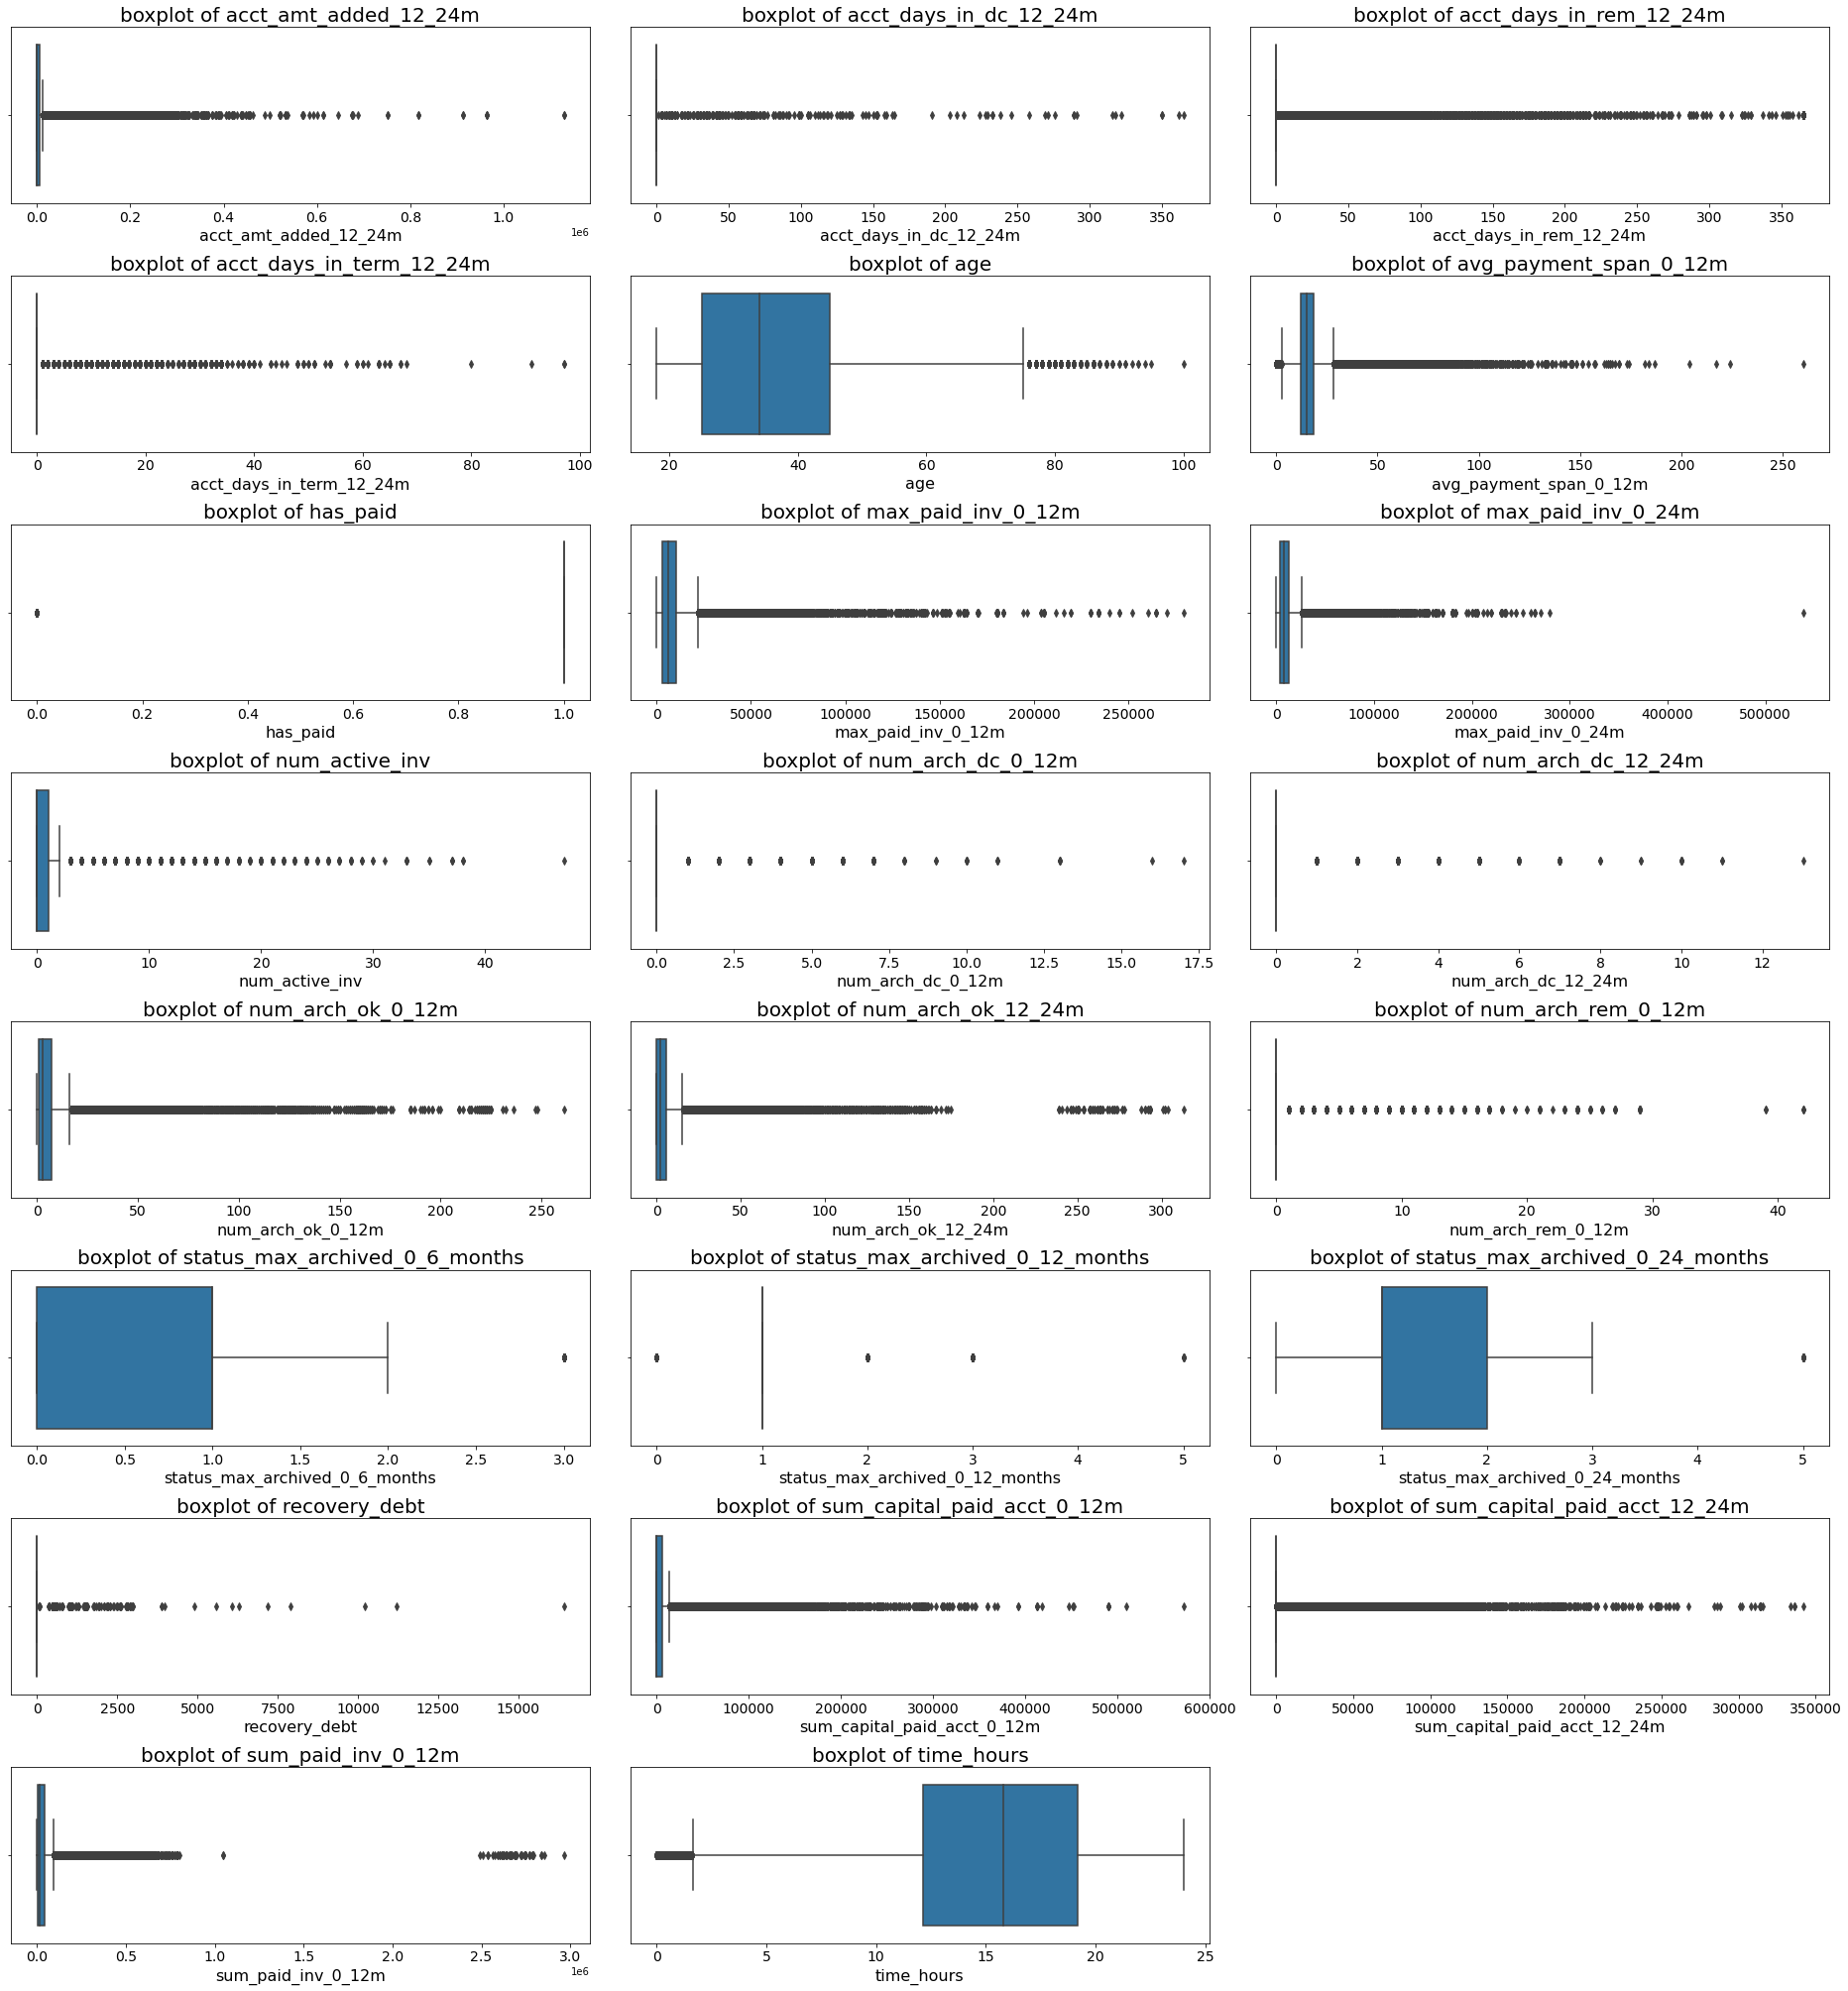

In [53]:
plt.figure(figsize=(26,28))
p=1
for i in credit1.drop(['default','merchant_category','merchant_group'],axis=1):
    plt.subplot(8,3,p)
    p=p+1
    sns.boxplot(data=credit1, x=credit1[i])
    plt.title('boxplot of {}'.format(i), fontsize=20)
    plt.xticks(fontsize=14)
    plt.xlabel(i, fontsize=16)
    plt.tight_layout()

* All the variables have outliers except 'time_hours'.
* Some variables have one or two outliers while some have a large number of outliers.
* Thus, we are going to use Inter-quartile-range (IQR) method for treating the outliers.

In [54]:
for i in credit1.drop(['default','merchant_category','merchant_group'],axis=1):
    q1=credit1[i].quantile(0.25)
    q3=credit1[i].quantile(0.75)
    iqr=q3-q1
    ul = q3 + (1.5 * iqr)
    ll = q1 - (1.5 * iqr)
    credit1[i]=np.where(credit1[i]>ul,ul,credit1[i])
    credit1[i]=np.where(credit1[i]<ll,ll,credit1[i])

#### Checking the boxplots again

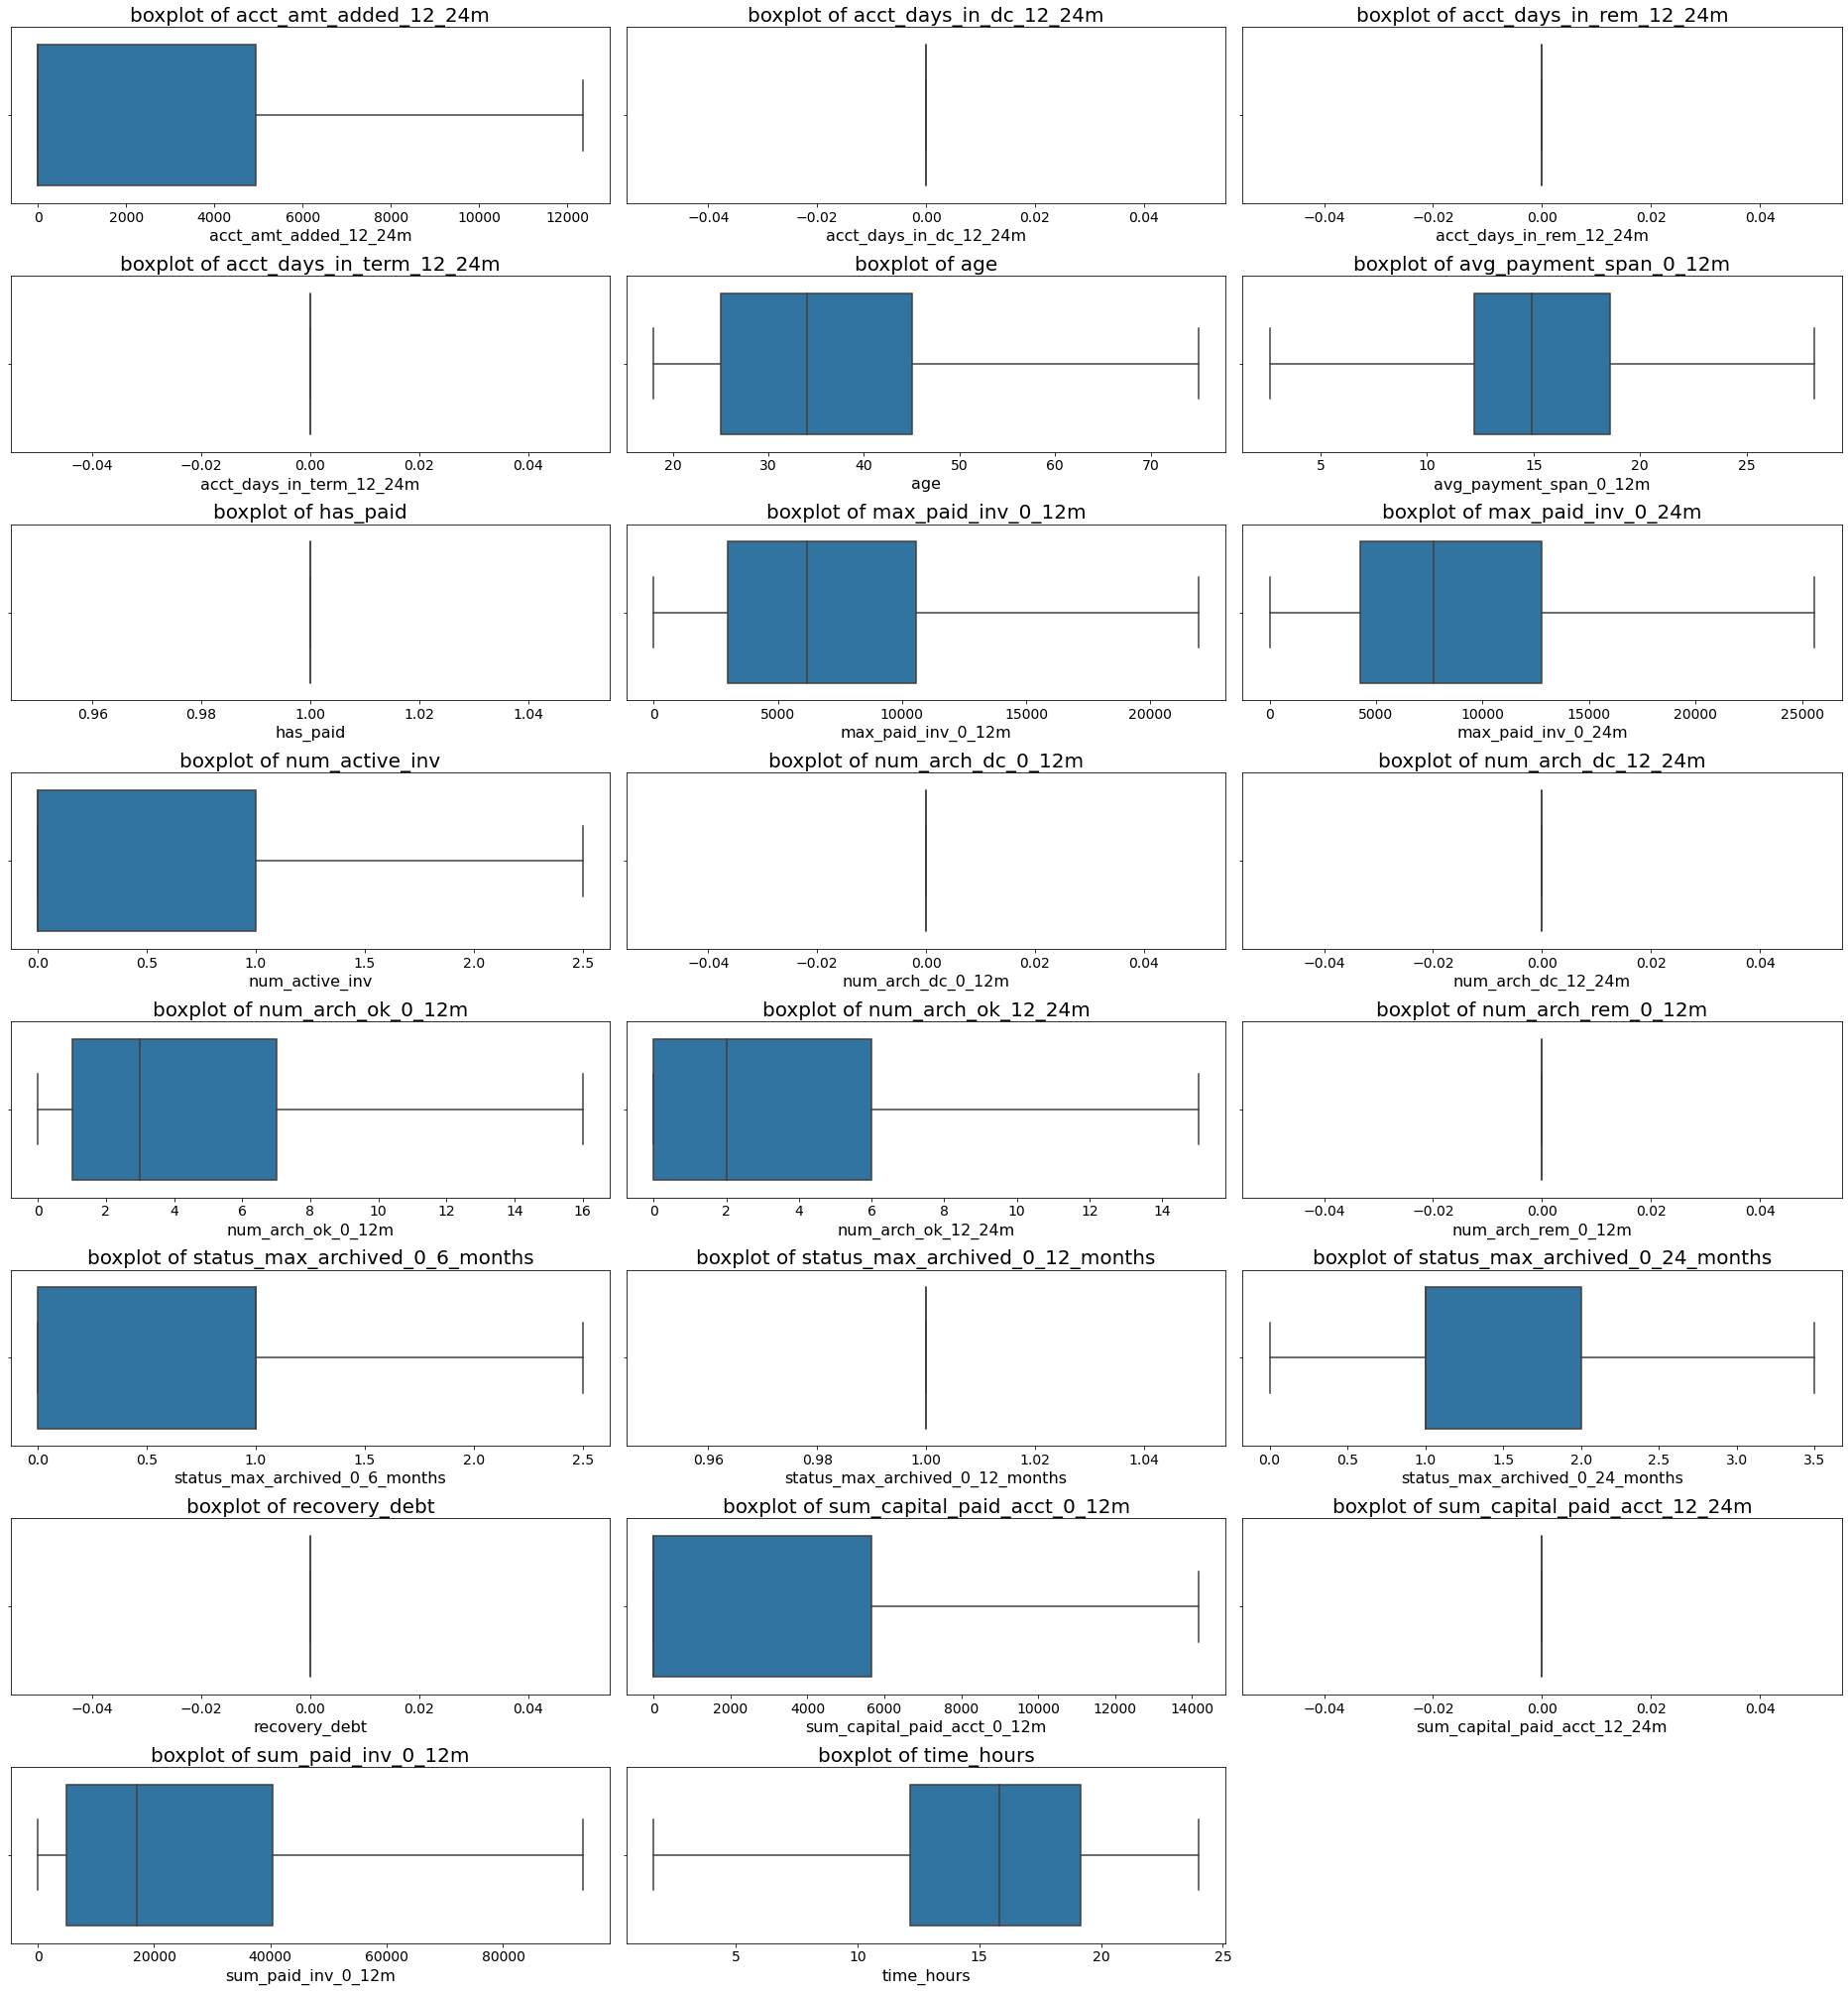

In [55]:
plt.figure(figsize=(26,28))
p=1
for i in credit1.drop(['default','merchant_category','merchant_group'],axis=1):
    plt.subplot(8,3,p)
    p=p+1
    sns.boxplot(data=credit1, x=credit1[i])
    plt.title('boxplot of {}'.format(i), fontsize=20)
    plt.xticks(fontsize=14)
    plt.xlabel(i, fontsize=16)
    plt.tight_layout()

#### As we can see outliers, all the outliers have been treated, but some of the variables have only zeroes left. Therefore dropping such variables.

In [56]:
credit1.describe().T

,count,mean,std,min,25%,50%,75%,max
default,99977.00,0.01,0.11,0.00,0.00,0.00,0.00,1.00
acct_amt_added_12_24m,99977.00,2976.08,5052.51,0.00,0.00,0.00,4937.00,12342.50
acct_days_in_dc_12_24m,99977.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
acct_days_in_rem_12_24m,99977.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
acct_days_in_term_12_24m,99977.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
age,99977.00,35.99,12.93,18.00,25.00,34.00,45.00,75.00
avg_payment_span_0_12m,99977.00,15.80,6.33,2.61,12.20,14.91,18.59,28.19
has_paid,99977.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
max_paid_inv_0_12m,99977.00,7535.97,6412.96,0.00,2990.00,6170.00,10570.00,21940.00
max_paid_inv_0_24m,99977.00,9307.62,7411.15,0.00,4250.00,7720.00,12785.00,25587.50


In [57]:
credit1.drop(['acct_days_in_dc_12_24m','acct_days_in_rem_12_24m','acct_days_in_term_12_24m',
              'num_arch_dc_0_12m','num_arch_dc_12_24m','num_arch_rem_0_12m',
              'recovery_debt','sum_capital_paid_acct_12_24m','has_paid',
              'status_max_archived_0_12_months'],axis=1, inplace = True)

In [58]:
credit1.describe().T

,count,mean,std,min,25%,50%,75%,max
default,99977.00,0.01,0.11,0.00,0.00,0.00,0.00,1.00
acct_amt_added_12_24m,99977.00,2976.08,5052.51,0.00,0.00,0.00,4937.00,12342.50
age,99977.00,35.99,12.93,18.00,25.00,34.00,45.00,75.00
avg_payment_span_0_12m,99977.00,15.80,6.33,2.61,12.20,14.91,18.59,28.19
max_paid_inv_0_12m,99977.00,7535.97,6412.96,0.00,2990.00,6170.00,10570.00,21940.00
max_paid_inv_0_24m,99977.00,9307.62,7411.15,0.00,4250.00,7720.00,12785.00,25587.50
num_active_inv,99977.00,0.42,0.75,0.00,0.00,0.00,1.00,2.50
num_arch_ok_0_12m,99977.00,4.66,5.18,0.00,1.00,3.00,7.00,16.00
num_arch_ok_12_24m,99977.00,3.97,4.93,0.00,0.00,2.00,6.00,15.00
status_max_archived_0_6_months,99977.00,0.83,0.66,0.00,0.00,1.00,1.00,2.50


#### Finally we are left with only 14 variables.

#### Checking the boxplots again

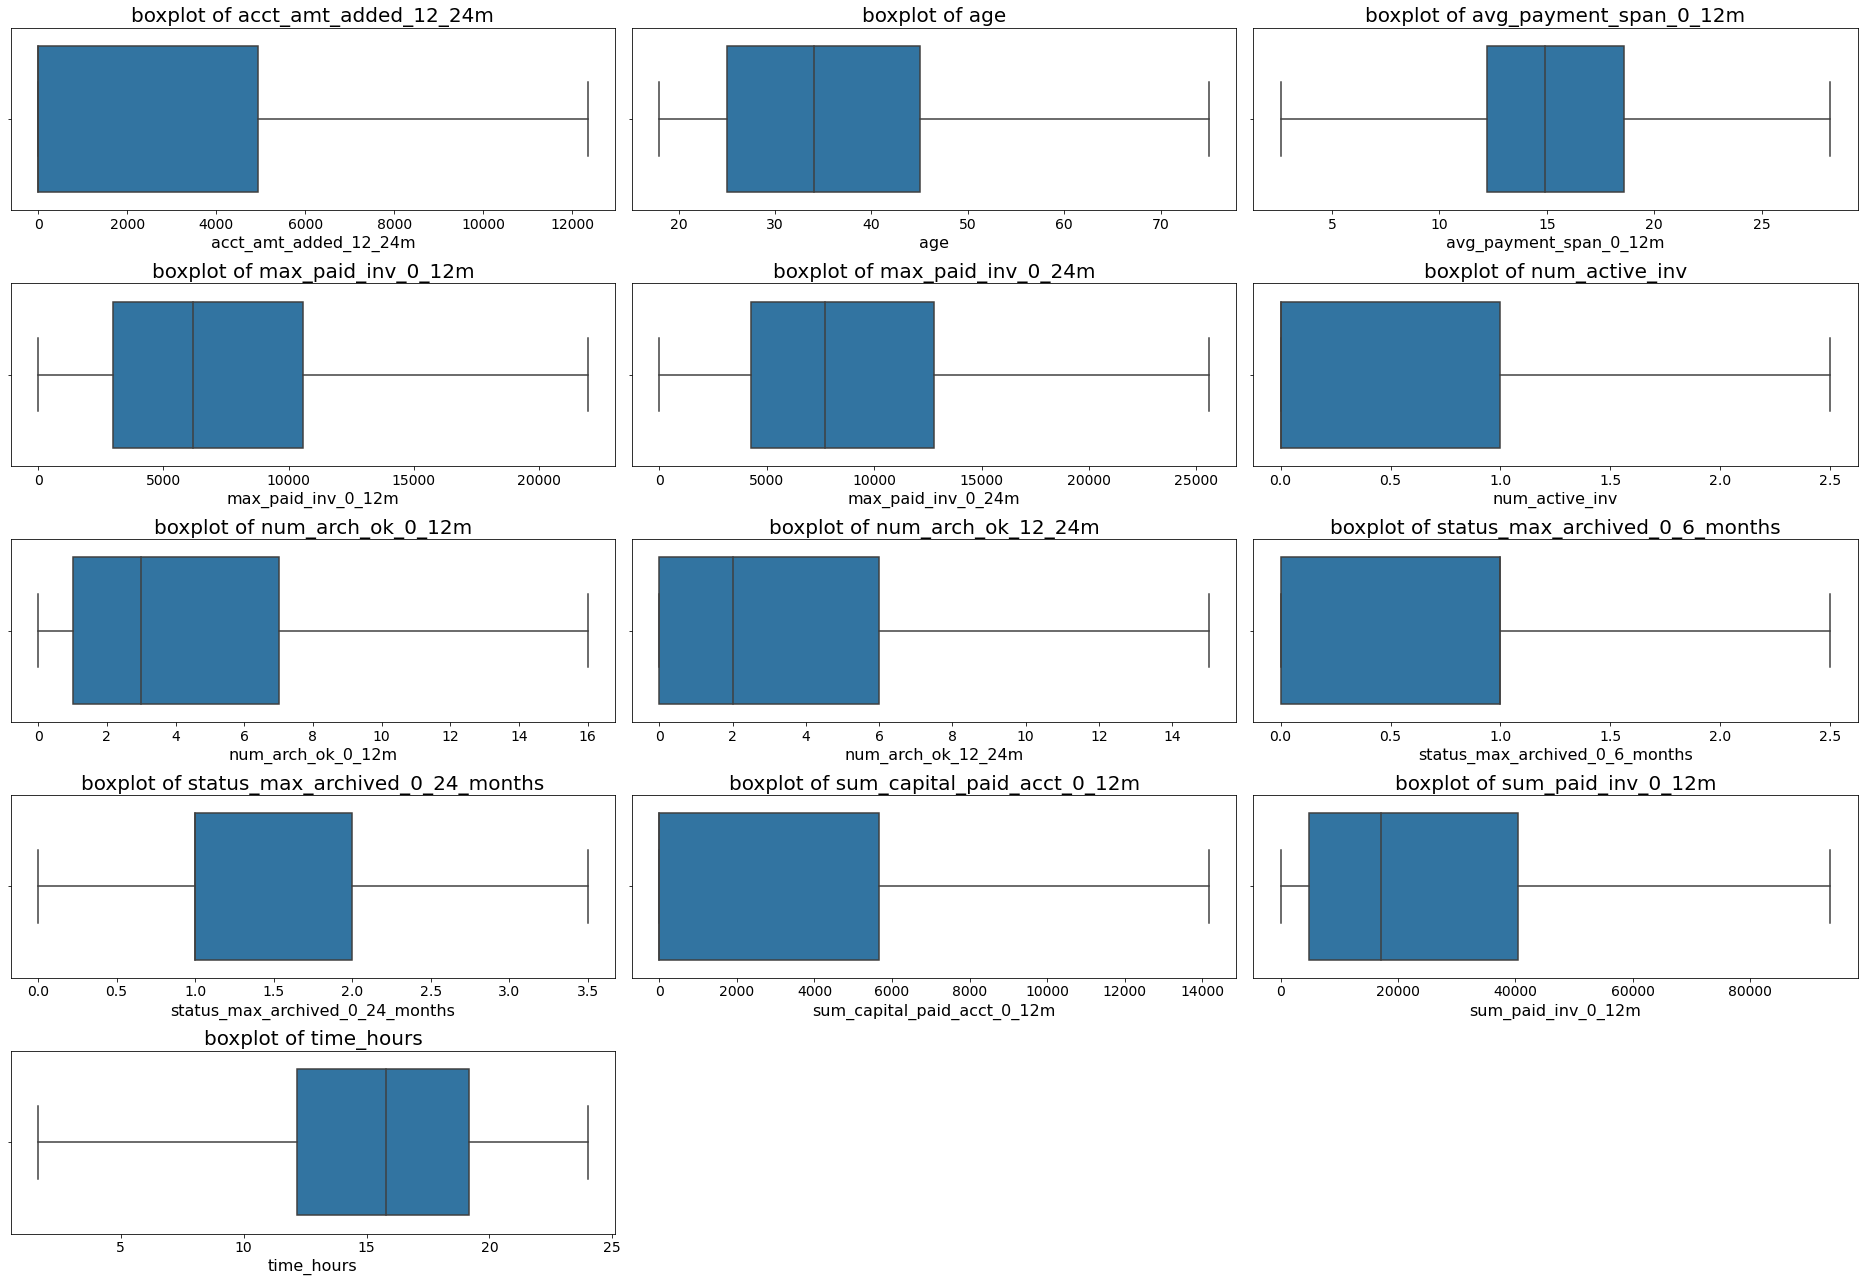

In [59]:
plt.figure(figsize=(26,28))
p=1
for i in credit1.drop(['default','merchant_category','merchant_group'],axis=1):
    plt.subplot(8,3,p)
    p=p+1
    sns.boxplot(data=credit1, x=credit1[i])
    plt.title('boxplot of {}'.format(i), fontsize=20)
    plt.xticks(fontsize=14)
    plt.xlabel(i, fontsize=16)
    plt.tight_layout()

---

## f) Variable transformation 

#### Segregate the predictors and response

In [60]:
predictors = credit1.drop(['default','merchant_category','merchant_group'],axis=1)
response = credit1['default']

* Scaling the predictors using StandardScaler (response binary in nature, doesn't need scaling)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [62]:
credit1_scaled = pd.concat([scaled_predictors, response], axis = 1)

In [63]:
credit1_scaled.columns

Index(['acct_amt_added_12_24m', 'age', 'avg_payment_span_0_12m',
       'max_paid_inv_0_12m', 'max_paid_inv_0_24m', 'num_active_inv',
       'num_arch_ok_0_12m', 'num_arch_ok_12_24m',
       'status_max_archived_0_6_months', 'status_max_archived_0_24_months',
       'sum_capital_paid_acct_0_12m', 'sum_paid_inv_0_12m', 'time_hours',
       'default'],
      dtype='object')

In [64]:
credit1_scaled.head()

,acct_amt_added_12_24m,age,avg_payment_span_0_12m,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_inv,num_arch_ok_0_12m,num_arch_ok_12_24m,status_max_archived_0_6_months,status_max_archived_0_24_months,sum_capital_paid_acct_0_12m,sum_paid_inv_0_12m,time_hours,default
0,-0.59,-1.24,-0.49,2.25,2.20,2.12,1.61,2.04,0.25,-0.28,-0.59,2.21,-1.22,0.00
1,-0.59,1.08,1.59,0.97,0.60,-0.56,0.84,2.24,0.25,1.00,-0.59,0.71,-0.47,0.00
2,-0.59,-1.08,0.66,2.25,2.20,0.78,1.22,-0.80,0.25,1.00,-0.59,2.21,-0.82,0.00
3,-0.59,0.00,-1.76,2.25,2.20,0.78,2.19,2.24,0.25,-0.28,-0.59,2.21,0.07,0.00
4,-0.59,-0.85,-0.44,-0.07,-0.30,-0.56,-0.71,-0.80,0.25,-0.28,-0.59,-0.70,-0.58,0.00


In [65]:
credit1_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
acct_amt_added_12_24m,99977.00,0.00,1.00,-0.59,-0.59,-0.59,0.39,1.85
age,99977.00,-0.00,1.00,-1.39,-0.85,-0.15,0.70,3.02
avg_payment_span_0_12m,99977.00,-0.00,1.00,-2.09,-0.57,-0.14,0.44,1.96
max_paid_inv_0_12m,99977.00,0.00,1.00,-1.18,-0.71,-0.21,0.47,2.25
max_paid_inv_0_24m,99977.00,-0.00,1.00,-1.26,-0.68,-0.21,0.47,2.20
num_active_inv,99977.00,0.00,1.00,-0.56,-0.56,-0.56,0.78,2.79
num_arch_ok_0_12m,99977.00,-0.00,1.00,-0.90,-0.71,-0.32,0.45,2.19
num_arch_ok_12_24m,99977.00,-0.00,1.00,-0.80,-0.80,-0.40,0.41,2.24
status_max_archived_0_6_months,99977.00,-0.00,1.00,-1.27,-1.27,0.25,0.25,2.54
status_max_archived_0_24_months,99977.00,-0.00,1.00,-1.57,-0.28,-0.28,1.00,2.93


----

----

# 4) Business insights from EDA

## a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business

#### Checking the target variable 'default'

In [66]:
credit['default'].value_counts()

default
0.00    88688
1.00     1288
Name: count, dtype: int64

#### Checking the proportion of default

In [67]:
credit['default'].value_counts(normalize = True)

default
0.00   0.99
1.00   0.01
Name: proportion, dtype: float64

In [68]:
credit1['default'].value_counts()

default
0.00    98689
1.00     1288
Name: count, dtype: int64

In [69]:
credit1['default'].value_counts(normalize = True)

default
0.00   0.99
1.00   0.01
Name: proportion, dtype: float64

* Dataset is highly unbalanced as 'defaulters' constitute only 1% of the dataset. 
* Hence we can balance it using 'SMOTE' in order to improve the models that will be build later on.

----

### b) Any business insights using clustering

We know that in presence of outliers, mean is the parameter that is affected the most. In case of K means clustering, to calculate the centroids mean is calculated again and again till we get the final centroid. So of course, K means clustering will be very sensitive to outliers.
Since our aim is to perform clustering, we are only concerned about outliers present in those variables which are required for clustering,
hence dropping the redundant variables first:

In [70]:
credit1_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
acct_amt_added_12_24m,99977.00,0.00,1.00,-0.59,-0.59,-0.59,0.39,1.85
age,99977.00,-0.00,1.00,-1.39,-0.85,-0.15,0.70,3.02
avg_payment_span_0_12m,99977.00,-0.00,1.00,-2.09,-0.57,-0.14,0.44,1.96
max_paid_inv_0_12m,99977.00,0.00,1.00,-1.18,-0.71,-0.21,0.47,2.25
max_paid_inv_0_24m,99977.00,-0.00,1.00,-1.26,-0.68,-0.21,0.47,2.20
num_active_inv,99977.00,0.00,1.00,-0.56,-0.56,-0.56,0.78,2.79
num_arch_ok_0_12m,99977.00,-0.00,1.00,-0.90,-0.71,-0.32,0.45,2.19
num_arch_ok_12_24m,99977.00,-0.00,1.00,-0.80,-0.80,-0.40,0.41,2.24
status_max_archived_0_6_months,99977.00,-0.00,1.00,-1.27,-1.27,0.25,0.25,2.54
status_max_archived_0_24_months,99977.00,-0.00,1.00,-1.57,-0.28,-0.28,1.00,2.93


#### Using K-Means clustering and since it comes under unsupervised learning we will do clustering containing all the varibles except the target variable.

#### Making an Elbow plot (up to n=10) and identifying optimum number of clusters for k-means algorithm.

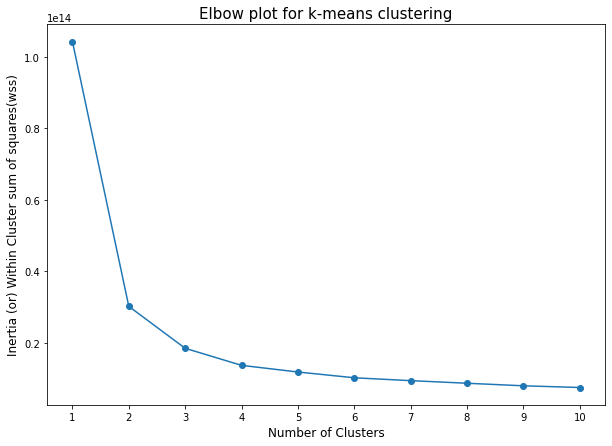

In [71]:
from sklearn.cluster import KMeans
wss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state = 123)
    kmeans.fit(predictors)
    wss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.xticks(np.arange(1,11))
plt.plot(range(1,11),wss,marker='o')
plt.title('Elbow plot for k-means clustering', fontsize=15)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia (or) Within Cluster sum of squares(wss)', fontsize=12)
plt.show()

#### As we can see in the Elbow plot, optimum number of clusters for the given k-means algorithm is 3. As after 3 there is no sharp decline in within sums of squares value.

* Optimum number of clusters using the elbow plot was found out to be 3. So taking number of clusters as 3 and clustering the data we get the following table:

In [72]:
k_means=KMeans(n_clusters=3, random_state = 123)
k_means.fit(predictors)
clusters = k_means.labels_
credit1.insert(0,'Clusters', clusters)
credit1.head()

,Clusters,default,acct_amt_added_12_24m,age,avg_payment_span_0_12m,merchant_category,merchant_group,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_inv,num_arch_ok_0_12m,num_arch_ok_12_24m,status_max_archived_0_6_months,status_max_archived_0_24_months,sum_capital_paid_acct_0_12m,sum_paid_inv_0_12m,time_hours
0,1,0.00,0.00,20.00,12.69,Dietary supplements,Health & Beauty,21940.00,25587.50,2.00,13.00,14.00,1.00,1.00,0.00,93677.50,9.65
1,2,0.00,0.00,50.00,25.83,Books & Magazines,Entertainment,13749.00,13749.00,0.00,9.00,15.00,1.00,2.00,0.00,49014.00,13.18
2,1,0.00,0.00,22.00,20.00,Diversified entertainment,Entertainment,21940.00,25587.50,1.00,11.00,0.00,1.00,2.00,0.00,93677.50,11.56
3,1,0.00,0.00,36.00,4.69,Diversified entertainment,Entertainment,21940.00,25587.50,1.00,16.00,15.00,1.00,1.00,0.00,93677.50,15.75
4,0,0.00,0.00,25.00,13.00,Electronic equipment & Related accessories,Electronics,7100.00,7100.00,0.00,1.00,0.00,1.00,1.00,0.00,7100.00,12.70


In [73]:
credit1.Clusters.value_counts().sort_index()

Clusters
0    62126
1    15952
2    21899
Name: count, dtype: int64

In [74]:
credit1.head()

,Clusters,default,acct_amt_added_12_24m,age,avg_payment_span_0_12m,merchant_category,merchant_group,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_inv,num_arch_ok_0_12m,num_arch_ok_12_24m,status_max_archived_0_6_months,status_max_archived_0_24_months,sum_capital_paid_acct_0_12m,sum_paid_inv_0_12m,time_hours
0,1,0.00,0.00,20.00,12.69,Dietary supplements,Health & Beauty,21940.00,25587.50,2.00,13.00,14.00,1.00,1.00,0.00,93677.50,9.65
1,2,0.00,0.00,50.00,25.83,Books & Magazines,Entertainment,13749.00,13749.00,0.00,9.00,15.00,1.00,2.00,0.00,49014.00,13.18
2,1,0.00,0.00,22.00,20.00,Diversified entertainment,Entertainment,21940.00,25587.50,1.00,11.00,0.00,1.00,2.00,0.00,93677.50,11.56
3,1,0.00,0.00,36.00,4.69,Diversified entertainment,Entertainment,21940.00,25587.50,1.00,16.00,15.00,1.00,1.00,0.00,93677.50,15.75
4,0,0.00,0.00,25.00,13.00,Electronic equipment & Related accessories,Electronics,7100.00,7100.00,0.00,1.00,0.00,1.00,1.00,0.00,7100.00,12.70


In [75]:
credit1_sub = credit1[['merchant_group','Clusters','age','acct_amt_added_12_24m','avg_payment_span_0_12m']]
credit1_sub.head()

,merchant_group,Clusters,age,acct_amt_added_12_24m,avg_payment_span_0_12m
0,Health & Beauty,1,20.00,0.00,12.69
1,Entertainment,2,50.00,0.00,25.83
2,Entertainment,1,22.00,0.00,20.00
3,Entertainment,1,36.00,0.00,4.69
4,Electronics,0,25.00,0.00,13.00


In [76]:
Freq = credit1_sub.groupby('merchant_group').Clusters.value_counts().sort_index()
Freq

merchant_group         Clusters
Automotive Products    0             665
                       1              83
                       2             189
Children Products      0            3028
                       1             874
                       2            1206
Clothing & Shoes       0            9437
                       1            2822
                       2            4469
Electronics            0            2076
                       1             360
                       2             598
Entertainment          0           26756
                       1            9784
                       2           12249
Erotic Materials       0             523
                       1              81
                       2             143
Food & Beverage        0             242
                       1              58
                       2              55
Health & Beauty        0            4321
                       1            1178
                       2 

#### Grouping the data by Clusters and taking mean to identify trends in acct_amt_added_12_24m, avg_payment_span_0_12m, avg_payment_span_0_12m and age based on merchant_group:

In [77]:
credit_profile = credit1_sub.groupby(['merchant_group','Clusters']).mean()
credit_profile.insert(0,'Frequency', Freq)
credit_profile

Frequency   age  acct_amt_added_12_24m  \
merchant_group        Clusters                                           
Automotive Products   0               665 37.24                1886.10   
                      1                83 34.18                3589.90   
                      2               189 35.02                3145.09   
Children Products     0              3028 35.19                2434.65   
                      1               874 32.61                6395.78   
                      2              1206 32.57                4974.68   
Clothing & Shoes      0              9437 30.36                2512.09   
                      1              2822 30.71                6068.79   
                      2              4469 29.57                4971.30   
Electronics           0              2076 37.31                2505.59   
                      1               360 33.64                4235.69   
                      2               598 34.98                4384.27   
Entertainment         0             26756 37.64                1834.52   
                      1              9784 38.00                3861.22   
                      2             12249 37.32                3143.55   
Erotic Materials      0               523 34.70                2121.65   
                      1                81 33.10                4786.58   
                      2               143 32.36                4411.26   
Food & Beverage       0               242 39.39                2835.89   
                      1                58 38.53                4039.95   
                      2                55 32.75                5677.34   
Health & Beauty       0              4321 33.95                2321.18   
                      1              1178 31.57                5030.45   
                      2              1857 31.07                4182.38   
Home & Garden         0              2451 39.82                2376.13   
                      1               498 34.22                5291.80   
                      2               769 34.76                4726.10   
Intangible products   0               955 45.93                2270.39   
                      1                51 35.73                6053.11   
                      2               116 37.26                4439.80   
Jewelry & Accessories 0               647 34.79                2968.66   
                      1               163 32.06                6286.31   
                      2               248 32.86                5066.56   
Leisure               0             11025 39.04                2929.29   

                                avg_payment_span_0_12m  
merchant_group        Clusters                          
Automotive Products   0                          15.16  
                      1                          15.59  
                      2                          16.17  
Children Products     0                          15.97  
                      1                          17.99  
                      2                          18.27  
Clothing & Shoes      0                          16.33  
                      1                          18.24  
                      2                          18.79  
Electronics           0                          15.29  
                      1                          15.48  
                      2                          16.59  
Entertainment         0                          14.94  
                      1                          14.71  
                      2                          15.27  
Erotic Materials      0                          15.85  
                      1                          15.68  
                      2                          17.94  
Food & Beverage       0                          14.91  
                      1                          16.98  
                      2                          17.73  
Health & Beauty       0                          15.78  

-----

-----

-----

# NOTES II : MODEL BUILDING AND TUNING

### Before doing this, we must balance the target variable 'default' using SMOTE.

#### Splitting the data into train and test sets

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response,
                                        test_size = 0.30, random_state = 1, stratify = response)

In [80]:
response.value_counts(normalize=True)

default
0.00   0.99
1.00   0.01
Name: proportion, dtype: float64

* As we can see the minority class i.e. the condition where the credit card user is a defaulter, has a representation of only 1% in the target variable. This suggests a very high data imbalance.
* SMOTE as a technique is generally applied if minority class is below 5%, thus here we will be applying SMOTE to balance the target variable.
* For this we will be taking a sampling strategy of 0.67 i.e. a distribution ratio of 60:40 among the target class 0 and 1 respectively. 
* A ratio of 50:50 would be oversampling since our original data was highly imbalanced, so even after resampling some imbalance should be there to keep the analysis authentic.

In [81]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state= 1, sampling_strategy=0.67)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [82]:
print('Resampled class proportion:')
print('---------------------------')
print(y_res.value_counts(normalize = True),'\n\n')
print('Original class proportion:')
print('--------------------------')
print(response.value_counts(normalize = True))

Resampled class proportion:
---------------------------
default
0.00   0.60
1.00   0.40
Name: proportion, dtype: float64 


Original class proportion:
--------------------------
default
0.00   0.99
1.00   0.01
Name: proportion, dtype: float64


* <mark><strong>As we can see after resampling the data, we got our new resampled predictors and response namely "X_res" and "y_res" and these will be our new training data which will be used for our model building later on.

# Building Models

### Getting the test and train predictors and responses for model building
* <mark> We have applied SMOTE only to the training data and not the testing data as we want to preserve the original data for testing our model.
* <mark><strong>Taking a copy of resampled training data and the original test data for model building.

In [83]:
X_train1 = X_res.copy()
X_test1 = X_test.copy()

## 1.) Logistic Regression Model

In [84]:
X_train2 = sm.add_constant(X_train1)  # Adding a constant term (intercept)

In [85]:
X_test2 = sm.add_constant(X_test1)

In [86]:
logit_model = sm.Logit(y_res, X_train2)  
result_lgr = logit_model.fit()

print(result_lgr.summary())

Optimization terminated successfully.
         Current function value: 0.504826
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:               115365
Model:                          Logit   Df Residuals:                   115351
Method:                           MLE   Df Model:                           13
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.2504
Time:                        21:27:33   Log-Likelihood:                -58239.
converged:                       True   LL-Null:                       -77698.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.5119      0.039     12.986  

#### Except variable 'status_max_archived_0_6_months' which has a p-value > 0.05, p values for all the other variables are less than 0.05 implying that these variables are significant in model building.
#### For the variable 'status_max_archived_0_6_months', we will leave it for now and come back to it after treating multicollinearity i.e. if till then it still remains insignificant to model building.
#### Impact of Multicollinearity on model Interpretation: Even if all variables are individually significant except one, multicollinearity can still make it challenging to interpret the coefficients of the predictor variables correctly. High multicollinearity can result in unstable coefficient estimates. Hence we must treat multicollinearity before moving ahead.

### Inspecting possible correlations between independent variables to get rid of Multicollinearity.

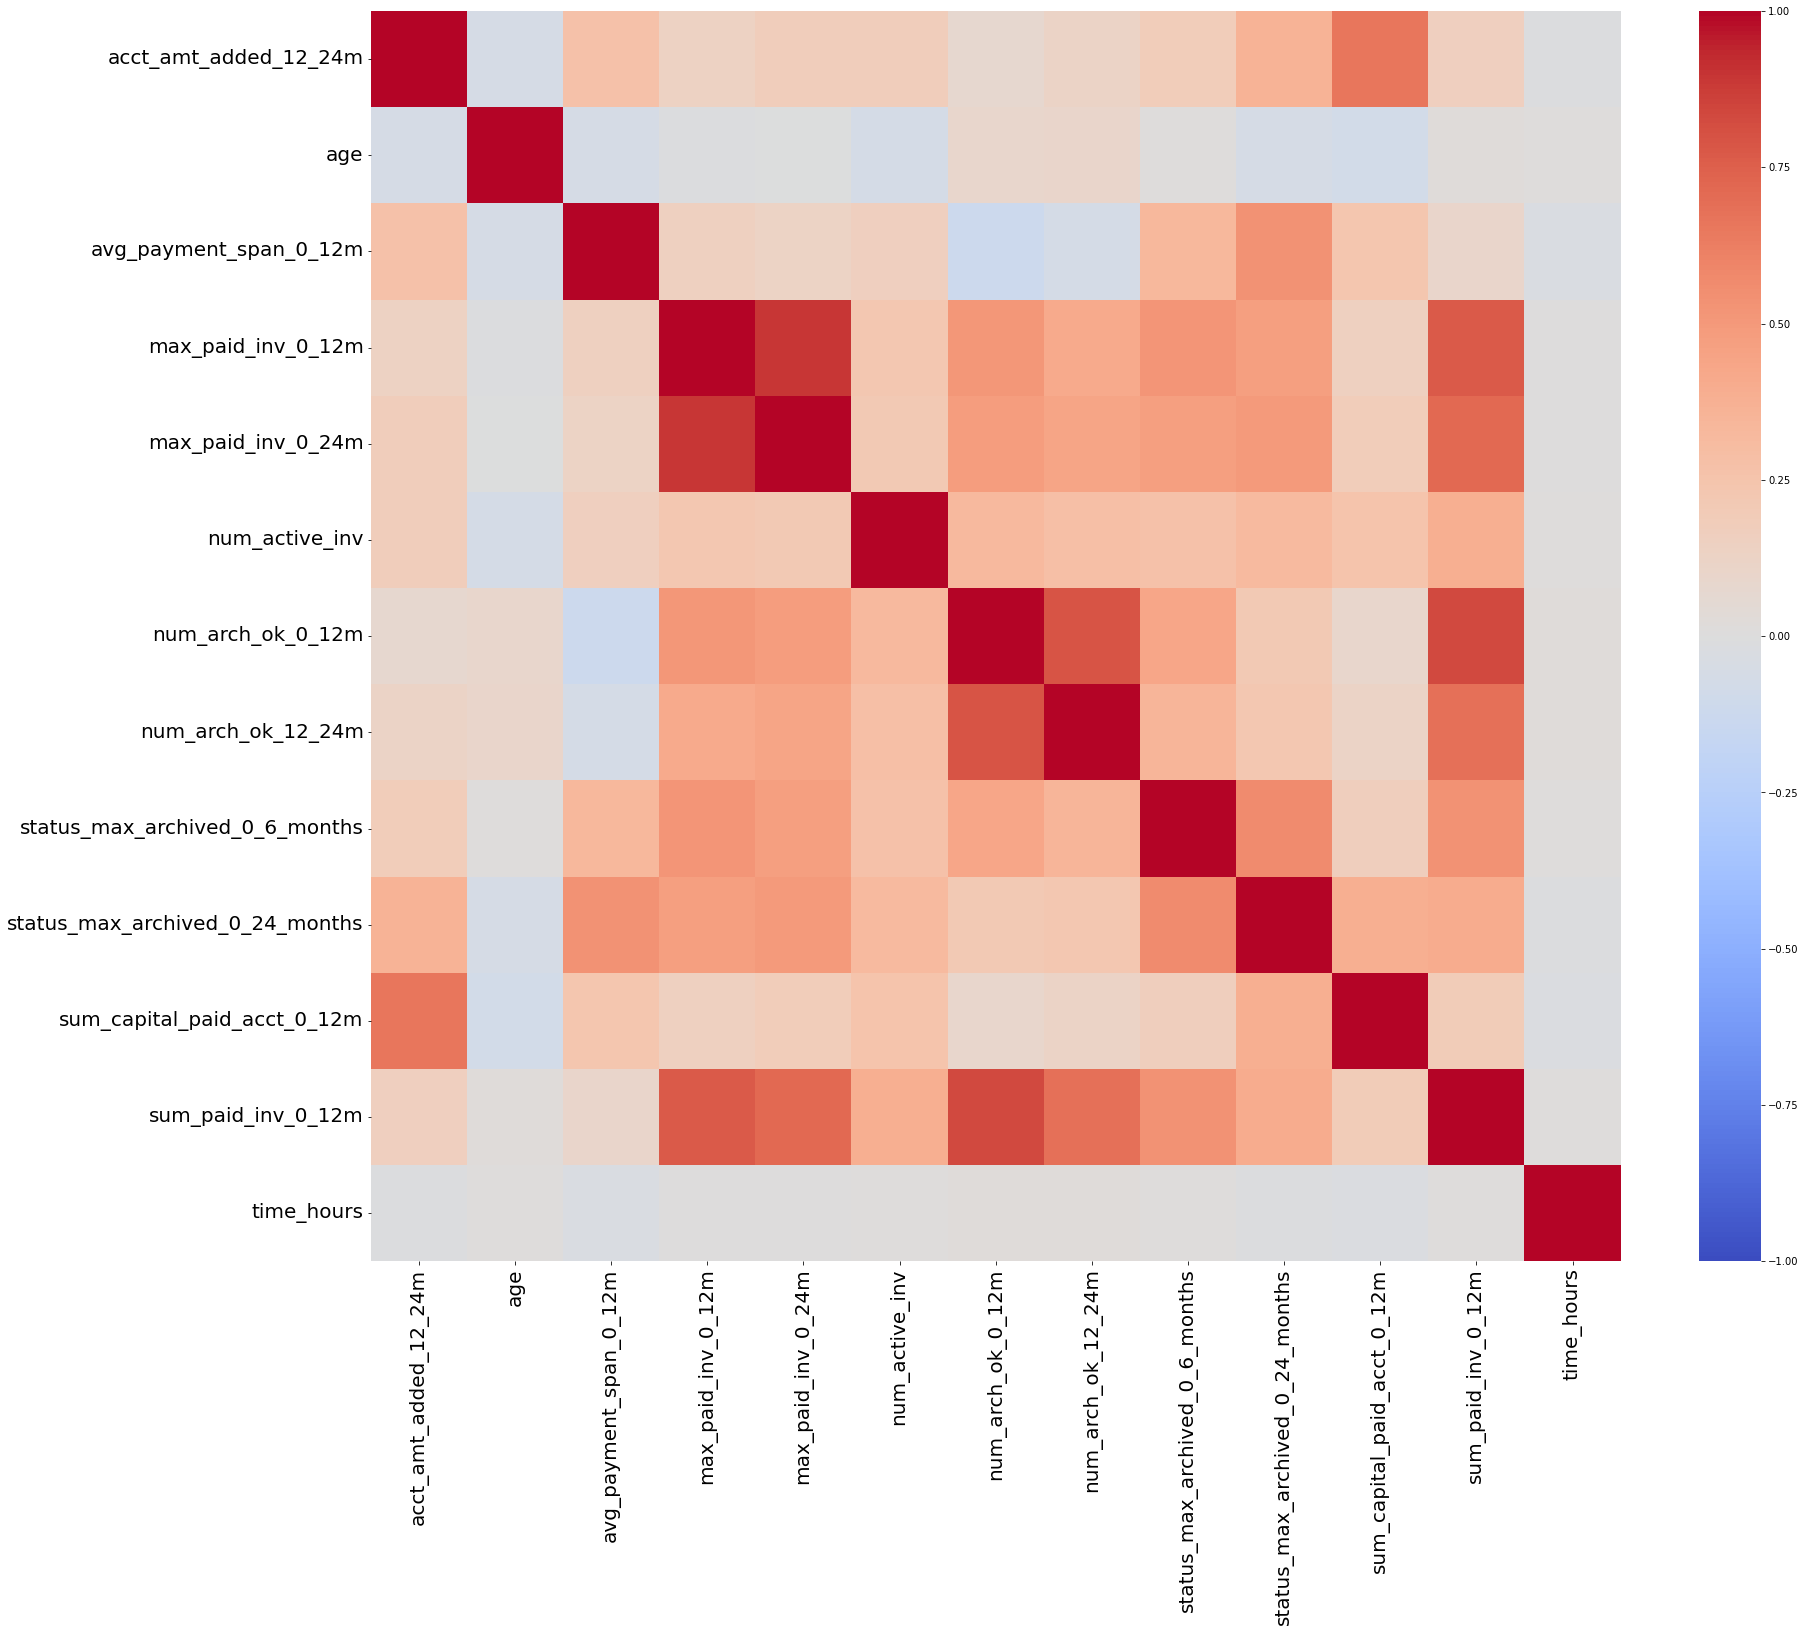

In [87]:
plt.figure(figsize = (28,23))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cor_matrix = X_train1.corr()
sns.heatmap(cor_matrix, cmap = 'coolwarm', vmin = -1, vmax= 1)
plt.show()

#### As we can see there are some red squares especially around the diagonal line, which represent high correlation. we will be using VIF (Variance Inflation Factor) method to get rid of highly correlated columns.

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


In [89]:
i= pd.Series([vif(X_train2.values, j) for j in range(X_train2.shape[1])],index=X_train2.columns)
i.sort_values(ascending =False, inplace = True)
print('VIF Values for the variables:')
print('-----------------------------')
print(i)


VIF Values for the variables:
-----------------------------
const                             30.17
sum_paid_inv_0_12m                 7.93
max_paid_inv_0_12m                 7.00
num_arch_ok_0_12m                  5.95
max_paid_inv_0_24m                 5.44
num_arch_ok_12_24m                 2.90
status_max_archived_0_24_months    2.36
sum_capital_paid_acct_0_12m        1.92
status_max_archived_0_6_months     1.90
acct_amt_added_12_24m              1.85
avg_payment_span_0_12m             1.71
num_active_inv                     1.30
age                                1.03
time_hours                         1.00
dtype: float64


In [90]:
pseudo_r_squared = np.round(result_lgr.prsquared, 3)
print("Pseudo R-squared with all the variables present:", pseudo_r_squared)

Pseudo R-squared with all the variables present: 0.25


#### According to the VIF values, features 'sum_paid_inv_0_12m', 'max_paid_inv_0_12m', 'num_arch_ok_0_12m' and 'max_paid_inv_0_24m'  are showing high multicollinearity, i.e. they are correlated with one or more independent features.

* To treat multicollinearity, we will have to drop one or more of the correlated features.
We will drop the feature that has the least impact on the pseudo R-squared of the logistic regression model.

## Let's drop multicollinear features one at a time and observe the effect on the logistic regression model:

In [91]:
X_train3 = X_train2.drop(["sum_paid_inv_0_12m"], axis=1)
logit_model2 = sm.Logit(y_res, X_train3)  
result_lgr2 = logit_model2.fit()
pseudo_r_squared = np.round(result_lgr2.prsquared, 3)
print("Pseudo R-squared after dropping 'sum_paid_inv_0_12m':", pseudo_r_squared)

Optimization terminated successfully.
         Current function value: 0.508276
         Iterations 7
Pseudo R-squared after dropping 'sum_paid_inv_0_12m': 0.245


#### On dropping 'sum_paid_inv_0_12m', Pseudo R-squared decreased only by 0.004, thus we can definitely drop 'sum_paid_inv_0_12m'.

In [92]:
i= pd.Series([vif(X_train3.values, j) for j in range(X_train3.shape[1])],index=X_train3.columns)
i.sort_values(ascending =False, inplace = True)
print('VIF Values for the variables:')
print('-----------------------------')
print(i)

VIF Values for the variables:
-----------------------------
const                             29.08
max_paid_inv_0_12m                 5.58
max_paid_inv_0_24m                 5.43
num_arch_ok_0_12m                  3.52
num_arch_ok_12_24m                 2.88
status_max_archived_0_24_months    2.36
sum_capital_paid_acct_0_12m        1.91
status_max_archived_0_6_months     1.90
acct_amt_added_12_24m              1.85
avg_payment_span_0_12m             1.62
num_active_inv                     1.25
age                                1.03
time_hours                         1.00
dtype: float64


In [93]:
X_train4 = X_train3.drop(["max_paid_inv_0_12m"], axis=1)
logit_model3 = sm.Logit(y_res, X_train4)  
result_lgr3 = logit_model3.fit()
pseudo_r_squared = np.round(result_lgr3.prsquared, 3)
print("Pseudo R-squared after dropping 'max_paid_inv_0_12m':", pseudo_r_squared)

Optimization terminated successfully.
         Current function value: 0.508425
         Iterations 7
Pseudo R-squared after dropping 'max_paid_inv_0_12m': 0.245


#### On dropping 'max_paid_inv_0_12m', Pseudo R-squared didnot decrese at all, thus we can definitely drop 'max_paid_inv_0_12m'.

In [94]:
i= pd.Series([vif(X_train4.values, j) for j in range(X_train4.shape[1])],index=X_train4.columns)
i.sort_values(ascending =False, inplace = True)
print('VIF Values for the variables:')
print('-----------------------------')
print(i)


VIF Values for the variables:
-----------------------------
const                             29.07
num_arch_ok_0_12m                  3.35
num_arch_ok_12_24m                 2.80
status_max_archived_0_24_months    2.35
sum_capital_paid_acct_0_12m        1.91
acct_amt_added_12_24m              1.84
status_max_archived_0_6_months     1.84
max_paid_inv_0_24m                 1.69
avg_payment_span_0_12m             1.61
num_active_inv                     1.25
age                                1.03
time_hours                         1.00
dtype: float64


### So since the VIF values are < 5, almost close to <= 3 it means that now we have little to almost no multicollinearity in our data.

In [95]:
y_res.value_counts()

default
0.00    69081
1.00    46284
Name: count, dtype: int64

In [96]:
y_test.value_counts()

default
0.00    29608
1.00      386
Name: count, dtype: int64

In [97]:
print(y_res.value_counts(normalize=True), y_test.value_counts(normalize=True))

default
0.00   0.60
1.00   0.40
Name: proportion, dtype: float64 default
0.00   0.99
1.00   0.01
Name: proportion, dtype: float64


----

#### Building the logit model after treating multicollinearity

In [98]:
logit_model = sm.Logit(y_res, X_train4)  
result_lgr = logit_model.fit()

print(result_lgr.summary())

Optimization terminated successfully.
         Current function value: 0.508425
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:               115365
Model:                          Logit   Df Residuals:                   115353
Method:                           MLE   Df Model:                           11
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.2451
Time:                        21:27:37   Log-Likelihood:                -58654.
converged:                       True   LL-Null:                       -77698.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2815      0.038      7.348  

#### Here we can see that the variable 'sum_capital_paid_acct_0_12m' has got a p-value of 0.729 which is greater than 0.05, hence this variable is not significant for predictind classes and we should drop this variable.

### Dropping the above found redundant variables from the train and test data based on multicollinearity and p-value significance for prediction

In [99]:
X_train1 = X_train1.drop(["sum_paid_inv_0_12m", "max_paid_inv_0_12m", "sum_capital_paid_acct_0_12m"], axis=1)
X_test1 = X_test1.drop(["sum_paid_inv_0_12m", "max_paid_inv_0_12m", "sum_capital_paid_acct_0_12m"], axis=1)

#### Building the logit model again

In [100]:
X_train2 = sm.add_constant(X_train1)  # Adding a constant term (intercept)

In [101]:
X_test2 = sm.add_constant(X_test1)

In [102]:
logit_model = sm.Logit(y_res, X_train2)  
result_lgr = logit_model.fit()

print(result_lgr.summary())

Optimization terminated successfully.
         Current function value: 0.508426
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:               115365
Model:                          Logit   Df Residuals:                   115354
Method:                           MLE   Df Model:                           10
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.2451
Time:                        21:27:38   Log-Likelihood:                -58655.
converged:                       True   LL-Null:                       -77698.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2822      0.038      7.378  

#### These 10 variables are the final significant variables(as all of them have p-value < 0.05) left after treating multicollinearity.

### Predicting on Training and Test data using the trained logistic regression model:

In [103]:
train_pred_lgr = result_lgr.predict(X_train2)
test_pred_lgr = result_lgr.predict(X_test2)

#### Getting predicted classes for train and test data on the default threshold of 0.5:
* Optimum threshold or cut off means choosing a threshold probability that best balances the trade-off between the true positive rate(TPR) and the false positive rate(FPR) of the model. By default this value is 0.5.

In [104]:
y_class_train_pred=[]   # Getting the Predicted Classes
for p in range(0,len(train_pred_lgr)):
    if np.array(train_pred_lgr)[p]>0.5:
        a=1
    else:
        a=0
    y_class_train_pred.append(a)

In [105]:
y_class_test_pred=[]
for p in range(0,len(test_pred_lgr)):
    if np.array(test_pred_lgr)[p]>0.5:
        a=1
    else:
        a=0
    y_class_test_pred.append(a)

#### Classification report for the train and test data:

In [106]:
print('classification_report for train data:')
print('------------------------------------')
print(metrics.classification_report(y_res,y_class_train_pred))
print('======================================================\n')
print('classification_report for test data:')
print('-----------------------------------')
print(metrics.classification_report(y_test,y_class_test_pred))

classification_report for train data:
------------------------------------
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.79     69081
         1.0       0.68      0.67      0.67     46284

    accuracy                           0.74    115365
   macro avg       0.73      0.73      0.73    115365
weighted avg       0.74      0.74      0.74    115365


classification_report for test data:
-----------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89     29608
         1.0       0.04      0.70      0.08       386

    accuracy                           0.80     29994
   macro avg       0.52      0.75      0.48     29994
weighted avg       0.98      0.80      0.88     29994



* The model is slightly underfitting as our target performance parameter i.e. "recall" in train data has slightly increased for test data.
* Morever the trained model itself is not good enough as the recall parameter for class 1 is a bit low.
#### So, we will try to tune the model further to make it a better.

----

### Model tuning using Performance Metrics based on optimum cut-off (threshold value):

#### Choosing the optimal threshold:
* Optimum threshold or cut off means choosing a threshold probability that best balances the trade-off between the true positive rate(TPR) and the false positive rate(FPR) of the model. By default this value is 0.5.

In [107]:
fpr, tpr, thresholds = roc_curve(y_res, train_pred_lgr)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('The optimum Cut-off value is:',optimal_threshold)

The optimum Cut-off value is: 0.411124285251017


#### Getting predicted classes for train and test data on the optimum threshold of 0.4

In [108]:
y_class_train_pred=[]
for i in range(0,len(train_pred_lgr)):
    if np.array(train_pred_lgr)[i]>0.4:
        a=1
    else:
        a=0
    y_class_train_pred.append(a)

In [109]:
y_class_test_pred=[]
for i in range(0,len(test_pred_lgr)):
    if np.array(test_pred_lgr)[i]>0.4:
        a=1
    else:
        a=0
    y_class_test_pred.append(a)

#### Updated Classification report (lgr) for the train and test data:

In [110]:
print('Updated classification_report for train data:')
print('--------------------------------------------')
print(metrics.classification_report(y_res,y_class_train_pred))
print('======================================================\n')
print('Updated classification_report for test data:')
print('-------------------------------------------')
print(metrics.classification_report(y_test,y_class_test_pred))

Updated classification_report for train data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.68      0.75     69081
         1.0       0.63      0.81      0.71     46284

    accuracy                           0.73    115365
   macro avg       0.73      0.74      0.73    115365
weighted avg       0.75      0.73      0.73    115365


Updated classification_report for test data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.69      0.81     29608
         1.0       0.03      0.81      0.06       386

    accuracy                           0.69     29994
   macro avg       0.51      0.75      0.44     29994
weighted avg       0.98      0.69      0.80     29994



#### Updated Confusion matrix for the train data based on optimum threshold of 0.4:

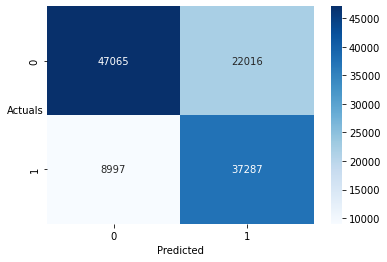

In [111]:
sns.heatmap((metrics.confusion_matrix(y_res,y_class_train_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Updated Confusion matrix for the test data based on optimum threshold of 0.4:

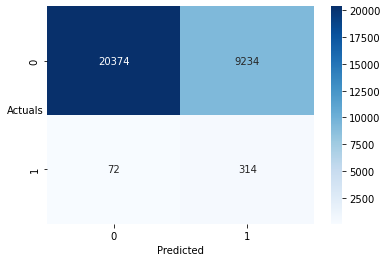

In [112]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_test_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### AUC and ROC for the train data:

AUC for training data: 0.816


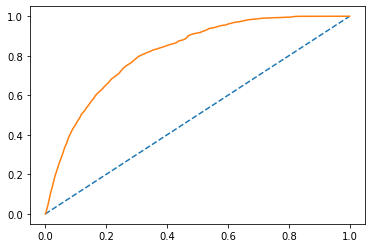

In [113]:
# calculate AUC
train_auc = roc_auc_score(y_res, train_pred_lgr)
print('AUC for training data: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, train_pred_lgr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### AUC and ROC for the testing data:

AUC for testing data: 0.829


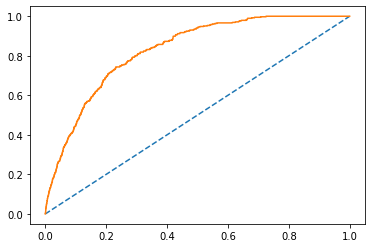

In [114]:
test_auc = roc_auc_score(y_test, test_pred_lgr)
print('AUC for testing data: %.3f' % test_auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_pred_lgr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

-----


---

## 2.) LDA(Linear Discriminant Analysis) Model:

#### Training the LDA model using the train data:

In [115]:
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train1,y_res)

#### Generating Coefficients and intercept for the Linear Discriminant Function:

In [116]:
print('The intercept value for the linear discriminant function is:',np.round(clf.intercept_,2))

The intercept value for the linear discriminant function is: [0.23]


In [117]:
print('Coefficients for the Linear Discriminant Function are:\n\n',np.round(clf.coef_,2))

Coefficients for the Linear Discriminant Function are:

 [[ 0.   -0.03  0.06 -0.    0.65 -0.1  -0.1  -0.25  0.27 -0.02]]


In [118]:
X_train1.columns

Index(['acct_amt_added_12_24m', 'age', 'avg_payment_span_0_12m',
       'max_paid_inv_0_24m', 'num_active_inv', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'status_max_archived_0_6_months',
       'status_max_archived_0_24_months', 'time_hours'],
      dtype='object')

#### The Linear Discriminant Function is as follows:  
LDF = 0.23 + (0 x acct_amt_added_12_24m) + (-0.03 x age) + (0.06 x avg_payment_span_0_12m)
      + (-0 x max_paid_inv_0_24m) + (0.65 x num_active_inv) + (-0.1 x num_arch_ok_0_12m)
      + (-0.25 x num_arch_ok_12_24m) + (0.27 x status_max_archived_0_6_months)+ (-0.02 x time_hours)

From the above equation and the coefficients it is clear that:  

* predictor <strong>'num_active_inv'(0.65)</strong> has the largest magnitude and thus play a major role in predicting classes and it is positively correlated to the predictive classses, meaning higher is the predictor value, higher is the LDF score i.e. higher is the likelihood that the user will belong to class 1(defaulters) since it is our target class.
* Then come predictors <strong>'status_max_archived_0_6_months'(0.27) and 'num_arch_ok_12_24m'(-0.25)</strong>while the former is positively correlated the later is negatively correlated.
* Negative correlation means that higher is the predictor value, lower is the LDF score i.e. higher is the likelihood that the user will belong to class 0 (Non-defaulters).
* predictors 'acct_amt_added_12_24m' and 'max_paid_inv_0_24m' have a zero magnitude meaning they do not play any role in class prediction.
* predictors 'age', 'time_hours' also have a very small magnitude and thus do not play much role in class prediction.

#### Predicting on Train and Test data using the trained LDA model:


In [119]:
train_pred_lda = lda_model.predict(X_train1)
test_pred_lda = lda_model.predict(X_test1)

#### Classification report for the train and test data:

In [120]:
print('classification_report for train data:')
print('------------------------------------')
print(metrics.classification_report(y_res,train_pred_lda))
print('======================================================\n')
print('classification_report for test data:')
print('-----------------------------------')
print(metrics.classification_report(y_test,test_pred_lda))

classification_report for train data:
------------------------------------
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78     69081
         1.0       0.68      0.66      0.67     46284

    accuracy                           0.74    115365
   macro avg       0.73      0.73      0.73    115365
weighted avg       0.74      0.74      0.74    115365


classification_report for test data:
-----------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88     29608
         1.0       0.04      0.68      0.08       386

    accuracy                           0.79     29994
   macro avg       0.52      0.74      0.48     29994
weighted avg       0.98      0.79      0.87     29994



* The model is slightly underfitting in relation to the recall parameter for class 1.
* Morever the trained model itself is not good enough as the recall parameter for class 1, which is our main concern as per the business problem, is a bit low.
#### So, we will try to tune the model further to make it a better.

### Model tuning using Hyper-parameters optimisation:

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
grid = {
    'solver': ['lsqr', 'eigen'],  # Solvers for covariance estimation
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],  # Shrinkage parameter (if solver='lsqr')
    'n_components': [None, 1, 2, 3],  # Number of components to keep
}

In [123]:
grid_search = GridSearchCV(estimator = lda_model, param_grid = grid, cv = 5,scoring='accuracy',n_jobs=-1)

In [124]:
grid_search.fit(X_train1, y_res)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'n_components': [None, 1, 2, 3],
                         'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
                         'solver': ['lsqr', 'eigen']},
             scoring='accuracy')

In [125]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'n_components': None, 'shrinkage': 'auto', 'solver': 'lsqr'} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')


In [126]:
lda_best_model = grid_search.best_estimator_

In [127]:
train_pred_lda_best = lda_best_model.predict(X_train1)
test_pred_lda_best = lda_best_model.predict(X_test1)

In [128]:
print('classification_report for train data:')
print('------------------------------------')
print(metrics.classification_report(y_res,train_pred_lda_best))
print('======================================================\n')
print('classification_report for test data:')
print('-----------------------------------')
print(metrics.classification_report(y_test,test_pred_lda_best))

classification_report for train data:
------------------------------------
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78     69081
         1.0       0.68      0.66      0.67     46284

    accuracy                           0.74    115365
   macro avg       0.73      0.73      0.73    115365
weighted avg       0.74      0.74      0.74    115365


classification_report for test data:
-----------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88     29608
         1.0       0.04      0.68      0.08       386

    accuracy                           0.79     29994
   macro avg       0.52      0.74      0.48     29994
weighted avg       0.98      0.79      0.87     29994



#### Getting the Predicted Classes and Probabilities:



In [129]:
train_probs_lda_best = lda_best_model.predict_proba(X_train1)[:,1]   # keep probabilities for the positive outcome only
test_probs_lda_best = lda_best_model.predict_proba(X_test1)[:,1]

### Model tuning using Performance Metrics based on optimum cut-off (threshold value):

#### Choosing the optimal threshold

In [130]:
fpr, tpr, thresholds = roc_curve(y_res, train_probs_lda_best)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('The optimum Cut-off value is:',optimal_threshold)

The optimum Cut-off value is: 0.39496411800395564


#### Updated Confusion matrix for the train and test data based on optimum cut-off of 0.395:

In [131]:
y_class_train_pred=[]
for i in range(0,len(train_probs_lda_best)):
    if np.array(train_probs_lda_best)[i]>0.395:
        a=1
    else:
        a=0
    y_class_train_pred.append(a)

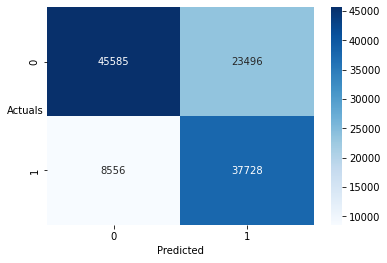

In [132]:
sns.heatmap((metrics.confusion_matrix(y_res,y_class_train_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Updated Confusion matrix for the test data based on optimum cut-off of 0.395:

In [133]:
y_class_test_pred=[]
for i in range(0,len(test_probs_lda_best)):
    if np.array(test_probs_lda_best)[i]>0.395:
        a=1
    else:
        a=0
    y_class_test_pred.append(a)

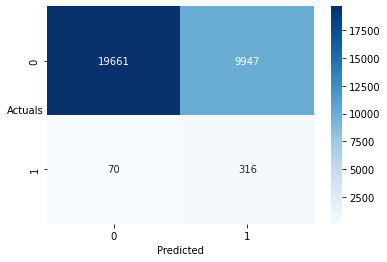

In [134]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_test_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Updated Classification report (LDA) for the train and test data:

In [135]:
print('Updated classification_report for train data:')
print('--------------------------------------------')
print(metrics.classification_report(y_res,y_class_train_pred))
print('======================================================\n')
print('Updated classification_report for test data:')
print('-------------------------------------------')
print(metrics.classification_report(y_test,y_class_test_pred))

Updated classification_report for train data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.66      0.74     69081
         1.0       0.62      0.82      0.70     46284

    accuracy                           0.72    115365
   macro avg       0.73      0.74      0.72    115365
weighted avg       0.75      0.72      0.72    115365


Updated classification_report for test data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.66      0.80     29608
         1.0       0.03      0.82      0.06       386

    accuracy                           0.67     29994
   macro avg       0.51      0.74      0.43     29994
weighted avg       0.98      0.67      0.79     29994



#### AUC and ROC for the train data:

AUC for training data: 0.811


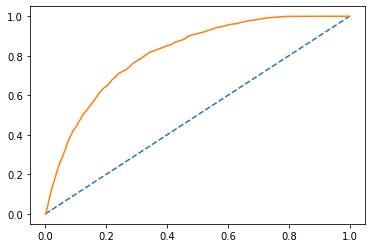

In [136]:
# calculate AUC
train_auc = roc_auc_score(y_res, train_probs_lda_best)
print('AUC for training data: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, train_probs_lda_best)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### AUC and ROC for the testing data:

AUC for testing data: 0.827


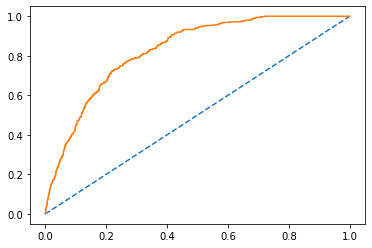

In [137]:
test_auc = roc_auc_score(y_test, test_probs_lda_best)
print('AUC for testing data: %.3f' % test_auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs_lda_best)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

-----

----

## 3.) Bagging

In [138]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


bag_model = BaggingClassifier(base_estimator= RandomForestClassifier(),n_estimators=50,random_state=1)

bag_model.fit(X_train1, y_res)


BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50,
                  random_state=1)

#### Predicting on Train and Test data using the trained Bagging model with Random Forest as the base Estimator:


In [139]:
train_pred_bag = bag_model.predict(X_train1)
test_pred_bag = bag_model.predict(X_test1)

### Now checking the model performance on train and test data: 

#### Model performance (Bag_rf) on the Train and Test Data

In [140]:
print('train data:')
print('-----------')
print(metrics.classification_report(y_res, train_pred_bag))
print('======================================================')
print('test data:')
print('----------')
print(metrics.classification_report(y_test,test_pred_bag))


train data:
-----------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     69081
         1.0       0.98      0.99      0.99     46284

    accuracy                           0.99    115365
   macro avg       0.99      0.99      0.99    115365
weighted avg       0.99      0.99      0.99    115365

test data:
----------
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     29608
         1.0       0.05      0.10      0.07       386

    accuracy                           0.96     29994
   macro avg       0.52      0.54      0.52     29994
weighted avg       0.98      0.96      0.97     29994



#### Is model overfitting or underfitting?
* The model is too overfitting specially for class 1.

#### Conclusion
* The model is too overfitting specially for class 1 as the performance metrics for the train and test data for class 1 have a variance of more than 80%. 
* It is highly unlikely that we will be able to improve this model even after performing hyper-parameter tuning as the recall value(our target parameter) is too low for class 1 (10%).
* Hence we will not be tunng this Bagging ensembe model having random forest as the base estimator.
* We will still be tuning the base model based on optimum threshold value.

### Tuning the base model based on optimum threshold value:

#### Getting the Predicted Classes and Probabilities:



In [141]:
train_probs_bag = bag_model.predict_proba(X_train1)[:,1]   # keep probabilities for the positive outcome only
test_probs_bag = bag_model.predict_proba(X_test1)[:,1]

### Model tuning using Performance Metrics based on optimum cut-off (threshold value):

#### Choosing the optimal threshold

In [142]:
fpr, tpr, thresholds = roc_curve(y_res, train_probs_bag)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('The optimum Cut-off value is:',optimal_threshold)

The optimum Cut-off value is: 0.41119999999999995


#### Updated Confusion matrix for the train and test data based on optimum cut-off of 0.4:

In [143]:
y_class_train_pred=[]
for i in range(0,len(train_probs_bag)):
    if np.array(train_probs_bag)[i]>0.4:
        a=1
    else:
        a=0
    y_class_train_pred.append(a)

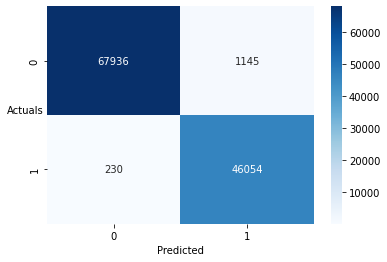

In [144]:
sns.heatmap((metrics.confusion_matrix(y_res,y_class_train_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Updated Confusion matrix for the test data based on optimum cut-off of 0.4:

In [145]:
y_class_test_pred=[]
for i in range(0,len(test_probs_bag)):
    if np.array(test_probs_bag)[i]>0.4:
        a=1
    else:
        a=0
    y_class_test_pred.append(a)

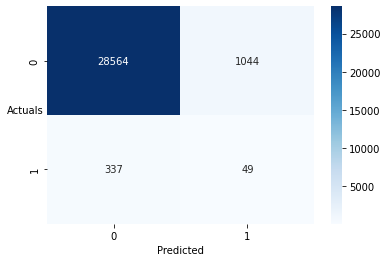

In [146]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_test_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Updated Classification report for the train and test data:

In [147]:
print('Updated classification_report for train data:')
print('--------------------------------------------')
print(metrics.classification_report(y_res,y_class_train_pred))
print('======================================================\n')
print('Updated classification_report for test data:')
print('-------------------------------------------')
print(metrics.classification_report(y_test,y_class_test_pred))

Updated classification_report for train data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     69081
         1.0       0.98      1.00      0.99     46284

    accuracy                           0.99    115365
   macro avg       0.99      0.99      0.99    115365
weighted avg       0.99      0.99      0.99    115365


Updated classification_report for test data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98     29608
         1.0       0.04      0.13      0.07       386

    accuracy                           0.95     29994
   macro avg       0.52      0.55      0.52     29994
weighted avg       0.98      0.95      0.96     29994



#### AUC and ROC for the train data:

AUC for training data: 0.999


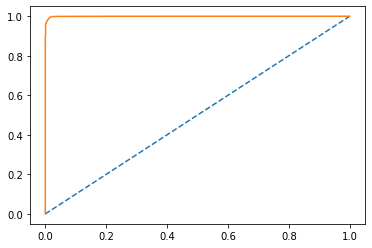

In [148]:
# predict probabilities
probs = bag_model.predict_proba(X_train1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_res, probs)
print('AUC for training data: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### AUC and ROC for the test data:

AUC for testing data: 0.790


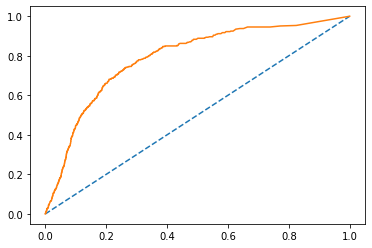

In [149]:
# predict probabilities
probs = bag_model.predict_proba(X_test1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC for testing data: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## 4.) Boosting

In [150]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 4.a) ADA Boosting

In [151]:
adaboost_model = AdaBoostClassifier(random_state=1)
adaboost_model.fit(X_train1,y_res)

AdaBoostClassifier(random_state=1)

#### Predicting on Train and Test data using the trained Naive Bayes model:


In [152]:
train_pred_ada = adaboost_model.predict(X_train1)
test_pred_ada = adaboost_model.predict(X_test1)

#### Getting the Predicted Classes and Probabilities:



### Now checking the model performance on train and test data: 

#### Model performance (ada_boost) on the Train and Test Data

In [153]:
print('train data:\n===========\n')
print('Accuracy score on training data:\n-------------------------------\n', 
      adaboost_model.score(X_train1, y_res))
print('\n')
print('Classification Report:\n----------------------\n', 
      metrics.classification_report(y_res, train_pred_ada))

print('\n')

print('test data:\n===========\n')
print('Accuracy score on testing data:\n-------------------------------\n', 
      adaboost_model.score(X_test1, y_test))
print('\n')
print('Classification Report:\n----------------------\n', 
      metrics.classification_report(y_test, test_pred_ada))

train data:

Accuracy score on training data:
-------------------------------
 0.8394313699995666


Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.86     69081
         1.0       0.79      0.82      0.80     46284

    accuracy                           0.84    115365
   macro avg       0.83      0.84      0.83    115365
weighted avg       0.84      0.84      0.84    115365



test data:

Accuracy score on testing data:
-------------------------------
 0.8460692138427686


Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.99      0.85      0.92     29608
         1.0       0.04      0.53      0.08       386

    accuracy                           0.85     29994
   macro avg       0.52      0.69      0.50     29994
weighted avg       0.98      0.85      0.91     29994



#### Is model overfitting or underfitting ?
* The model is a overfitting with respect to our target class 1. Also the recall value for class 1 is quite low.   
* we will try to make the model performance better using hyper-parameter tuning with help of GridSearchCV.

### Model Tuning:

In [154]:
adaboost_model.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [155]:
grid={'n_estimators': [30, 50, 70],
    'learning_rate':[0.01,0.1,1],
     'algorithm': ['SAMME', 'SAMME.R']}

In [156]:
grid_search = GridSearchCV(estimator = adaboost_model, param_grid = grid, cv = 7, n_jobs=-1)

In [157]:
grid_search.fit(X_train1, y_res)

GridSearchCV(cv=7, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [30, 50, 70]})

In [158]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 70} 

AdaBoostClassifier(learning_rate=1, n_estimators=70, random_state=1)


In [159]:
ada_best_model = grid_search.best_estimator_

In [160]:
train_pred_ada_best = ada_best_model.predict(X_train1)
test_pred_ada_best = ada_best_model.predict(X_test1)

### Now checking the model performance on train and test data: 

#### Model performance (ada_boost) on the Train and Test Data

In [161]:
print('train data:')
print('-----------')
print(metrics.classification_report(y_res, train_pred_ada_best))
print('======================================================')
print('test data:')
print('----------')
print(metrics.classification_report(y_test,test_pred_ada_best))


train data:
-----------
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     69081
         1.0       0.81      0.80      0.81     46284

    accuracy                           0.85    115365
   macro avg       0.84      0.84      0.84    115365
weighted avg       0.85      0.85      0.85    115365

test data:
----------
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93     29608
         1.0       0.05      0.45      0.08       386

    accuracy                           0.87     29994
   macro avg       0.52      0.67      0.51     29994
weighted avg       0.98      0.87      0.92     29994



#### Getting the Predicted Classes and Probabilities:



In [162]:
train_probs_ada = adaboost_model.predict_proba(X_train1)[:,1]   # keep probabilities for the positive outcome only
test_probs_ada = adaboost_model.predict_proba(X_test1)[:,1]

### Model tuning using Performance Metrics based on optimum cut-off (threshold value):

#### Choosing the optimal threshold

In [163]:
fpr, tpr, thresholds = roc_curve(y_res, train_probs_ada)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('The optimum Cut-off value is:',optimal_threshold)

The optimum Cut-off value is: 0.4980073206558555


#### Updated Confusion matrix for the train data based on optimum cut-off of 0.498:

In [164]:
y_class_train_pred=[]
for i in range(0,len(train_probs_ada)):
    if np.array(train_probs_ada)[i]>0.498:
        a=1
    else:
        a=0
    y_class_train_pred.append(a)

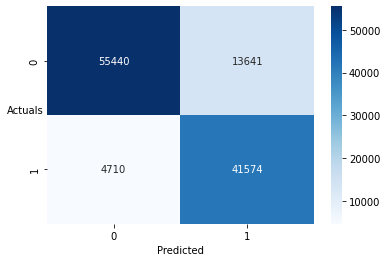

In [165]:
sns.heatmap((metrics.confusion_matrix(y_res,y_class_train_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Updated Confusion matrix for the test data based on optimum cut-off of 0.498:

In [166]:
y_class_test_pred=[]
for i in range(0,len(test_probs_ada)):
    if np.array(test_probs_ada)[i]>0.498:
        a=1
    else:
        a=0
    y_class_test_pred.append(a)

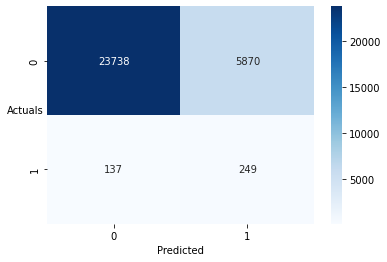

In [167]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_test_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Updated Classification report for the train and test data:

In [168]:
print('Updated classification_report for train data:')
print('--------------------------------------------')
print(metrics.classification_report(y_res,y_class_train_pred))
print('======================================================\n')
print('Updated classification_report for test data:')
print('-------------------------------------------')
print(metrics.classification_report(y_test,y_class_test_pred))

Updated classification_report for train data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86     69081
         1.0       0.75      0.90      0.82     46284

    accuracy                           0.84    115365
   macro avg       0.84      0.85      0.84    115365
weighted avg       0.85      0.84      0.84    115365


Updated classification_report for test data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.80      0.89     29608
         1.0       0.04      0.65      0.08       386

    accuracy                           0.80     29994
   macro avg       0.52      0.72      0.48     29994
weighted avg       0.98      0.80      0.88     29994



#### AUC and ROC for the tuned train data:

AUC for training data: 0.941


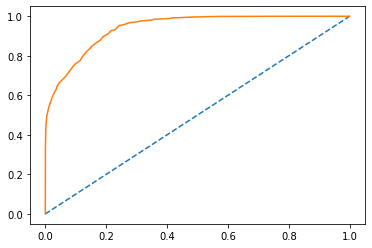

In [169]:
# predict probabilities
probs = ada_best_model.predict_proba(X_train1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_res, probs)
print('AUC for training data: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### AUC and ROC for the tuned test data:

AUC for testing data: 0.813


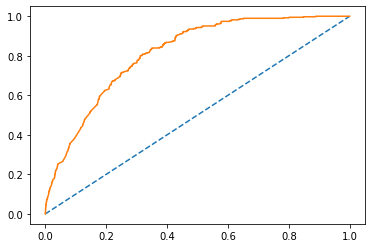

In [170]:
# predict probabilities
probs = ada_best_model.predict_proba(X_test1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC for testing data: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Feature importances for ADA Boosting model:


In [171]:
print (pd.DataFrame(adaboost_model.feature_importances_, columns = ["Imp"], index = X_train1.columns).sort_values('Imp',ascending=False))


                                 Imp
num_active_inv                  0.34
status_max_archived_0_24_months 0.20
status_max_archived_0_6_months  0.16
num_arch_ok_0_12m               0.08
num_arch_ok_12_24m              0.08
age                             0.04
max_paid_inv_0_24m              0.04
time_hours                      0.04
avg_payment_span_0_12m          0.02
acct_amt_added_12_24m           0.00


## 4.b) Gradient Boosting:

In [172]:
gradboost_model = GradientBoostingClassifier(random_state=1)
gradboost_model.fit(X_train1,y_res)

GradientBoostingClassifier(random_state=1)

#### Predicting on Train and Test data:


In [173]:
train_pred_grad = gradboost_model.predict(X_train1)
test_pred_grad = gradboost_model.predict(X_test1)

### Now checking the model performance (grad_boost) on train and test data: 

#### Model performance on the Train Data

In [174]:
print('Accuracy score on training data is:', gradboost_model.score(X_train1, y_res))
print('\n')
print(metrics.classification_report(y_res, train_pred_ada))

Accuracy score on training data is: 0.884288995795952


              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86     69081
         1.0       0.79      0.82      0.80     46284

    accuracy                           0.84    115365
   macro avg       0.83      0.84      0.83    115365
weighted avg       0.84      0.84      0.84    115365



#### Model performance on the Test Data

In [175]:
print('Accuracy score on testing data is:', gradboost_model.score(X_test1, y_test))
print('\n')
print(metrics.classification_report(y_test, test_pred_ada))

Accuracy score on testing data is: 0.9092818563712742


              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92     29608
         1.0       0.04      0.53      0.08       386

    accuracy                           0.85     29994
   macro avg       0.52      0.69      0.50     29994
weighted avg       0.98      0.85      0.91     29994



#### Is model overfitting or underfitting ?
* Gradient boosting also performed similar to ADA Boosting
* The model is highly overfitting.   
* we will try to make the model performance better using GridSearchCV.

### Model Tuning:

In [176]:
gradboost_model.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [177]:
grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be used
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinking to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of individual trees
}

In [178]:
grid_search = GridSearchCV(estimator = gradboost_model, param_grid = grid, cv = 3, n_jobs=-1)

In [179]:
grid_search.fit(X_train1, y_res)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [180]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300} 

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=300,
                           random_state=1)


In [181]:
grad_best_model = grid_search.best_estimator_

In [182]:
train_pred_grad_best = grad_best_model.predict(X_train1)
test_pred_grad_best = grad_best_model.predict(X_test1)

### Now checking the model performance on train and test data: 

#### Model performance on the Train and Test Data

In [183]:
print('train data:')
print('-----------')
print(metrics.classification_report(y_res, train_pred_grad_best))
print('======================================================')
print('test data:')
print('----------')
print(metrics.classification_report(y_test,test_pred_grad_best))


train data:
-----------
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     69081
         1.0       0.98      0.96      0.97     46284

    accuracy                           0.98    115365
   macro avg       0.98      0.98      0.98    115365
weighted avg       0.98      0.98      0.98    115365

test data:
----------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     29608
         1.0       0.05      0.06      0.05       386

    accuracy                           0.97     29994
   macro avg       0.52      0.52      0.52     29994
weighted avg       0.98      0.97      0.97     29994



#### Getting the Predicted Classes and Probabilities:



In [184]:
train_probs_grad = gradboost_model.predict_proba(X_train1)[:,1]   # keep probabilities for the positive outcome only
test_probs_grad = gradboost_model.predict_proba(X_test1)[:,1]

### Model tuning using Performance Metrics based on optimum cut-off (threshold value):

#### Choosing the optimal threshold

In [185]:
fpr, tpr, thresholds = roc_curve(y_res, train_probs_grad)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('The optimum Cut-off value is:',optimal_threshold)

The optimum Cut-off value is: 0.4559641109774015


#### Updated Confusion matrix for the train and test data based on optimum cut-off of 0.456:

In [186]:
y_class_train_pred=[]
for i in range(0,len(train_probs_grad)):
    if np.array(train_probs_grad)[i]>0.456:
        a=1
    else:
        a=0
    y_class_train_pred.append(a)

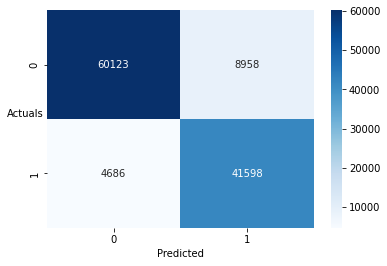

In [187]:
sns.heatmap((metrics.confusion_matrix(y_res,y_class_train_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Updated Confusion matrix for the test data based on optimum cut-off of 0.456:

In [188]:
y_class_test_pred=[]
for i in range(0,len(test_probs_grad)):
    if np.array(test_probs_grad)[i]>0.456:
        a=1
    else:
        a=0
    y_class_test_pred.append(a)

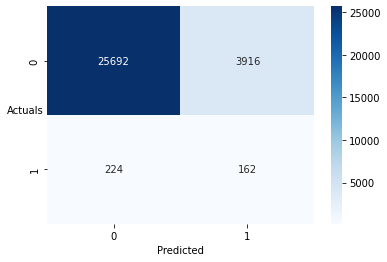

In [189]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_test_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Updated Classification report for the train and test data:

In [190]:
print('Updated classification_report for train data:')
print('--------------------------------------------')
print(metrics.classification_report(y_res,y_class_train_pred))
print('======================================================\n')
print('Updated classification_report for test data:')
print('-------------------------------------------')
print(metrics.classification_report(y_test,y_class_test_pred))

Updated classification_report for train data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     69081
         1.0       0.82      0.90      0.86     46284

    accuracy                           0.88    115365
   macro avg       0.88      0.88      0.88    115365
weighted avg       0.89      0.88      0.88    115365


Updated classification_report for test data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     29608
         1.0       0.04      0.42      0.07       386

    accuracy                           0.86     29994
   macro avg       0.52      0.64      0.50     29994
weighted avg       0.98      0.86      0.91     29994



#### AUC and ROC for the train data:

AUC for training data: 0.964


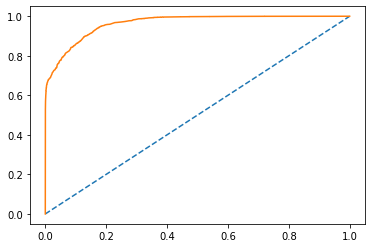

In [191]:
# predict probabilities
probs = gradboost_model.predict_proba(X_train1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_res, probs)
print('AUC for training data: %.3f' % train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### AUC and ROC for the test data:

AUC for testing data: 0.810


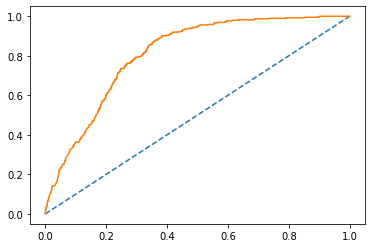

In [192]:
# predict probabilities
probs = gradboost_model.predict_proba(X_test1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC for testing data: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the best model:

In [193]:
y_class_train_pred=[]
for i in range(0,len(train_probs_grad)):
    if np.array(train_probs_grad)[i]>0.5:
        a=1
    else:
        a=0
    y_class_train_pred.append(a)

In [194]:
y_class_test_pred=[]
for i in range(0,len(test_probs_grad)):
    if np.array(test_probs_grad)[i]>0.5:
        a=1
    else:
        a=0
    y_class_test_pred.append(a)

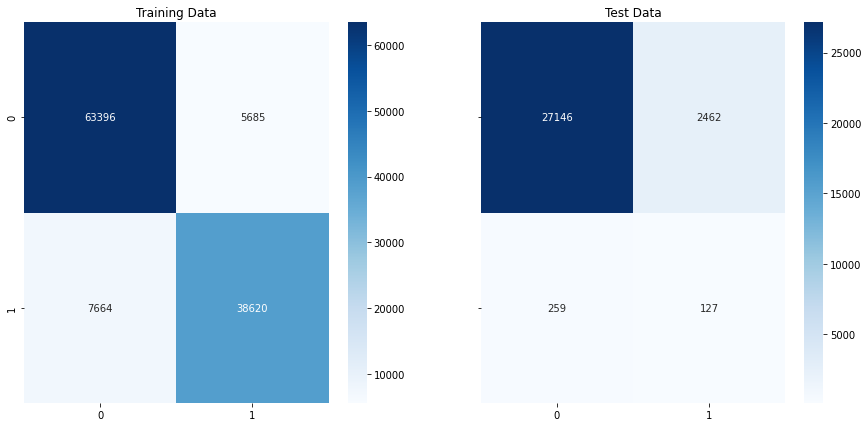

In [195]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(15,7))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_res,train_pred_grad)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,test_pred_grad)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');




#### Conclusion:
Model tuning did not help, infact it worsened the recall metric for class 1 even further. 

##### Hence, we will not consider the tuned model and will go with the base model only for comparison with other models.

#### Feature importances for the Gradient Boosting model:


In [196]:
print (pd.DataFrame(gradboost_model.feature_importances_, columns = ["Imp"], index = X_train1.columns).sort_values('Imp',ascending=False))


                                 Imp
num_active_inv                  0.25
num_arch_ok_0_12m               0.23
status_max_archived_0_24_months 0.19
num_arch_ok_12_24m              0.14
age                             0.08
avg_payment_span_0_12m          0.04
max_paid_inv_0_24m              0.03
status_max_archived_0_6_months  0.02
time_hours                      0.01
acct_amt_added_12_24m           0.00


----

----